In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import pickle
import scipy.stats
%matplotlib inline
from datetime import timedelta

In [2]:
ddir= '/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'
#read in different files
def open_ds(var,case,esm='cesm',model='cam',ens='001',stream='h0'):
    if esm=='cesm':
        if case[:4]=='hist':
            comp='BHIST'
            tseriesdir = ddir + 'b.e213.'+comp+'_BPRP.f09_g17.esm-hist-i308.'+ens+'/' 
        else:
            comp='BSSP126'
            tseriesdir = ddir + 'b.e213.'+comp+'_BPRP.f09_g17.esm-'+case+'-i308.'+ens+'/' 

        # define filename
        fn = var+'_b.e213.'+comp+'_BPRP.f09_g17.esm-'+case+'-i308.'+ ens + '.' + model + '.' + stream + '.nc'
    else:
        ens='i'+ens[-1]

        if case=='hist':
            case='histctl'
            tspan='1980-2014'
        else:
            tspan='2015-2099'
        tseriesdir = ddir + esm+'/'+case+'/'
        # define filename
        if stream=='h0':
            fn = var+'_monthly_'+esm+'_'+case+'_'+ens+'_no-dynveg_'+tspan+ '.nc'
        elif stream=='h2':
            fn = var+'_3hr_'+esm+'_'+case+'_'+ens+'_no-dynveg_'+tspan+ '.nc'
        elif stream=='h1':
            fn = var+'_'+esm+'_'+case+'_'+ens+'_no-dynveg_'+tspan+ '.nc'

    # check if variable timeseries exists and open variable as data array
    if not os.path.isfile(tseriesdir + fn):
        print(fn + ' does not exists in ')
        print(tseriesdir)
        return
    else: 
        
        if esm=='cesm':
            ds = xr.open_dataset(tseriesdir+fn)
        else:
           # ds = xr.open_dataset(savedir+fn)
            #print(ds.time.attrs['units'])
            ds = xr.open_dataset(tseriesdir+fn)
            ds['time']=pd.to_datetime(ds['time'], format='%Y%m%d') 
        return ds

def open_da(var, case,esm='cesm', model='cam',ens='001',stream='h0'):
    ds = open_ds(var, case, esm,model,ens,stream)
    if var=='2t':
        var='var167'
    da = ds[var]
    return da





In [3]:

ds_TREFHT_hist_1=open_da('TREFHT','hist','cesm','cam','001','h2')
ds_TREFHT_hist_2=open_da('TREFHT','hist','cesm','cam','002','h2')
ds_TREFHT_hist_3=open_da('TREFHT','hist','cesm','cam','003','h2')

ds_TREFHT_ctl_1=open_da('TREFHT','futctl','cesm','cam','001','h2')
ds_TREFHT_ctl_2=open_da('TREFHT','futctl','cesm','cam','002','h2')
ds_TREFHT_ctl_3=open_da('TREFHT','futctl','cesm','cam','003','h2')

ds_TREFHT_sust_1=open_da('TREFHT','futsust','cesm','cam','001','h2')
ds_TREFHT_sust_2=open_da('TREFHT','futsust','cesm','cam','002','h2')
ds_TREFHT_sust_3=open_da('TREFHT','futsust','cesm','cam','003','h2')

ds_TREFHT_ineq_1=open_da('TREFHT','futineq','cesm','cam','001','h2')
ds_TREFHT_ineq_2=open_da('TREFHT','futineq','cesm','cam','002','h2')
ds_TREFHT_ineq_3=open_da('TREFHT','futineq','cesm','cam','003','h2')



In [4]:

ds_TREFHT_mpiesm_hist_1=open_da('tas_daymean','hist','mpiesm','cam','001','h1')
ds_TREFHT_mpiesm_hist_2=open_da('tas_daymean','hist','mpiesm','cam','002','h1')
ds_TREFHT_mpiesm_hist_3=open_da('tas_daymean','hist','mpiesm','cam','003','h1')

ds_TREFHT_mpiesm_ctl_1=open_da('tas_daymean','futctl','mpiesm','cam','001','h1')
ds_TREFHT_mpiesm_ctl_2=open_da('tas_daymean','futctl','mpiesm','cam','002','h1')
ds_TREFHT_mpiesm_ctl_3=open_da('tas_daymean','futctl','mpiesm','cam','003','h1')

ds_TREFHT_mpiesm_sust_1=open_da('tas_daymean','futsust','mpiesm','cam','001','h1')
ds_TREFHT_mpiesm_sust_2=open_da('tas_daymean','futsust','mpiesm','cam','002','h1')
ds_TREFHT_mpiesm_sust_3=open_da('tas_daymean','futsust','mpiesm','cam','003','h1')

ds_TREFHT_mpiesm_ineq_1=open_da('tas_daymean','futineq','mpiesm','cam','001','h1')
ds_TREFHT_mpiesm_ineq_2=open_da('tas_daymean','futineq','mpiesm','cam','002','h1')
ds_TREFHT_mpiesm_ineq_3=open_da('tas_daymean','futineq','mpiesm','cam','003','h1')

ds_TREFHT_ecearth_hist_1=open_da('tas_daymean','hist','ecearth','cam','001','h1')
ds_TREFHT_ecearth_hist_2=open_da('tas_daymean','hist','ecearth','cam','002','h1')
ds_TREFHT_ecearth_hist_3=open_da('tas_daymean','hist','ecearth','cam','003','h1')

ds_TREFHT_ecearth_ctl_1=open_da('tas_daymean','futctl','ecearth','cam','001','h1')
ds_TREFHT_ecearth_ctl_2=open_da('tas_daymean','futctl','ecearth','cam','002','h1')
ds_TREFHT_ecearth_ctl_3=open_da('tas_daymean','futctl','ecearth','cam','003','h1')

ds_TREFHT_ecearth_sust_1=open_da('tas_daymean','futsust','ecearth','cam','001','h1')
ds_TREFHT_ecearth_sust_2=open_da('tas_daymean','futsust','ecearth','cam','002','h1')
ds_TREFHT_ecearth_sust_3=open_da('tas_daymean','futsust','ecearth','cam','003','h1')

ds_TREFHT_ecearth_ineq_1=open_da('tas_daymean','futineq','ecearth','cam','001','h1')
ds_TREFHT_ecearth_ineq_2=open_da('tas_daymean','futineq','ecearth','cam','002','h1')
ds_TREFHT_ecearth_ineq_3=open_da('tas_daymean','futineq','ecearth','cam','003','h1')


In [ ]:
#compute spatial means (global and/or regional)

ds_TREFHT_ecearth_hist_1_mean=ds_TREFHT_ecearth_hist_1.mean(['lat','lon'])[-30*30:]
ds_TREFHT_ecearth_hist_2_mean=ds_TREFHT_ecearth_hist_2.mean(['lat','lon'])[-30*30:]
ds_TREFHT_ecearth_hist_3_mean=ds_TREFHT_ecearth_hist_3.mean(['lat','lon'])[-30*30:]

ds_TREFHT_ecearth_hist_mean=xr.concat([ds_TREFHT_ecearth_hist_1_mean,ds_TREFHT_ecearth_hist_2_mean,ds_TREFHT_ecearth_hist_3_mean],'time')

ds_TREFHT_ecearth_ctl_1_mean=ds_TREFHT_ecearth_ctl_1.mean(['lat','lon'])[-30*30:]
ds_TREFHT_ecearth_ctl_2_mean=ds_TREFHT_ecearth_ctl_2.mean(['lat','lon'])[-30*30:]
ds_TREFHT_ecearth_ctl_3_mean=ds_TREFHT_ecearth_ctl_3.mean(['lat','lon'])[-30*30:]
ds_TREFHT_ecearth_ctl_mean=xr.concat([ds_TREFHT_ecearth_ctl_1_mean,ds_TREFHT_ecearth_ctl_2_mean,ds_TREFHT_ecearth_ctl_3_mean],'time')

ds_TREFHT_ecearth_sust_1_mean=ds_TREFHT_ecearth_sust_1.mean(['lat','lon'])[-30*30:]
ds_TREFHT_ecearth_sust_2_mean=ds_TREFHT_ecearth_sust_2.mean(['lat','lon'])[-30*30:]
ds_TREFHT_ecearth_sust_3_mean=ds_TREFHT_ecearth_sust_3.mean(['lat','lon'])[-30*30:]
ds_TREFHT_ecearth_sust_mean=xr.concat([ds_TREFHT_ecearth_sust_1_mean,ds_TREFHT_ecearth_sust_2_mean,ds_TREFHT_ecearth_sust_3_mean],'time')

ds_TREFHT_ecearth_ineq_1_mean=ds_TREFHT_ecearth_ineq_1.mean(['lat','lon'])[-30*30:]
ds_TREFHT_ecearth_ineq_2_mean=ds_TREFHT_ecearth_ineq_2.mean(['lat','lon'])[-30*30:]
ds_TREFHT_ecearth_ineq_3_mean=ds_TREFHT_ecearth_ineq_3.mean(['lat','lon'])[-30*30:]
ds_TREFHT_ecearth_ineq_mean=xr.concat([ds_TREFHT_ecearth_ineq_1_mean,ds_TREFHT_ecearth_ineq_2_mean,ds_TREFHT_ecearth_ineq_3_mean],'time')


ds_TREFHT_mpiesm_hist_1_mean=ds_TREFHT_mpiesm_hist_1.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_hist_2_mean=ds_TREFHT_mpiesm_hist_2.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_hist_3_mean=ds_TREFHT_mpiesm_hist_3.mean(['lat','lon'])[-30*30:]

ds_TREFHT_mpiesm_hist_mean=xr.concat([ds_TREFHT_mpiesm_hist_1_mean,ds_TREFHT_mpiesm_hist_2_mean,ds_TREFHT_mpiesm_hist_3_mean],'time')

ds_TREFHT_mpiesm_ctl_1_mean=ds_TREFHT_mpiesm_ctl_1.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_ctl_2_mean=ds_TREFHT_mpiesm_ctl_2.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_ctl_3_mean=ds_TREFHT_mpiesm_ctl_3.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_ctl_mean=xr.concat([ds_TREFHT_mpiesm_ctl_1_mean,ds_TREFHT_mpiesm_ctl_2_mean,ds_TREFHT_mpiesm_ctl_3_mean],'time')

ds_TREFHT_mpiesm_sust_1_mean=ds_TREFHT_mpiesm_sust_1.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_sust_2_mean=ds_TREFHT_mpiesm_sust_2.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_sust_3_mean=ds_TREFHT_mpiesm_sust_3.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_sust_mean=xr.concat([ds_TREFHT_mpiesm_sust_1_mean,ds_TREFHT_mpiesm_sust_2_mean,ds_TREFHT_mpiesm_sust_3_mean],'time')

ds_TREFHT_mpiesm_ineq_1_mean=ds_TREFHT_mpiesm_ineq_1.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_ineq_2_mean=ds_TREFHT_mpiesm_ineq_2.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_ineq_3_mean=ds_TREFHT_mpiesm_ineq_3.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_ineq_mean=xr.concat([ds_TREFHT_mpiesm_ineq_1_mean,ds_TREFHT_mpiesm_ineq_2_mean,ds_TREFHT_mpiesm_ineq_3_mean],'time')



In [ ]:

ds_TREFHT_hist_1_mean=ds_TREFHT_hist_1.mean(['lat','lon']).resample(time='D').mean('time')[-30*30-1:-1]
ds_TREFHT_hist_2_mean=ds_TREFHT_hist_2.mean(['lat','lon']).resample(time='D').mean('time')[-30*30-1:-1]
ds_TREFHT_hist_3_mean=ds_TREFHT_hist_3.mean(['lat','lon']).resample(time='D').mean('time')[-30*30-1:-1]
ds_TREFHT_hist_mean=xr.concat([ds_TREFHT_hist_1_mean,ds_TREFHT_hist_2_mean,ds_TREFHT_hist_3_mean],'time')

ds_TREFHT_ctl_1_mean=ds_TREFHT_ctl_1.mean(['lat','lon']).resample(time='D').mean('time')[-30*30-1:-1]
ds_TREFHT_ctl_2_mean=ds_TREFHT_ctl_2.mean(['lat','lon']).resample(time='D').mean('time')[-30*30-1:-1]
ds_TREFHT_ctl_3_mean=ds_TREFHT_ctl_3.mean(['lat','lon']).resample(time='D').mean('time')[-30*30-1:-1]
ds_TREFHT_ctl_mean=xr.concat([ds_TREFHT_ctl_1_mean,ds_TREFHT_ctl_2_mean,ds_TREFHT_ctl_3_mean],'time')

ds_TREFHT_sust_1_mean=ds_TREFHT_sust_1.mean(['lat','lon']).resample(time='D').mean('time')[-30*30-1:-1]
ds_TREFHT_sust_2_mean=ds_TREFHT_sust_2.mean(['lat','lon']).resample(time='D').mean('time')[-30*30-1:-1]
ds_TREFHT_sust_3_mean=ds_TREFHT_sust_3.mean(['lat','lon']).resample(time='D').mean('time')[-30*30-1:-1]
ds_TREFHT_sust_mean=xr.concat([ds_TREFHT_sust_1_mean,ds_TREFHT_sust_2_mean,ds_TREFHT_sust_3_mean],'time')

ds_TREFHT_ineq_1_mean=ds_TREFHT_ineq_1.mean(['lat','lon']).resample(time='D').mean('time')[-30*30-1:-1]
ds_TREFHT_ineq_2_mean=ds_TREFHT_ineq_2.mean(['lat','lon']).resample(time='D').mean('time')[-30*30-1:-1]
ds_TREFHT_ineq_3_mean=ds_TREFHT_ineq_3.mean(['lat','lon']).resample(time='D').mean('time')[-30*30-1:-1]
ds_TREFHT_ineq_mean=xr.concat([ds_TREFHT_ineq_1_mean,ds_TREFHT_ineq_2_mean,ds_TREFHT_ineq_3_mean],'time')


In [ ]:
# test values for the bw_method option ('None' is the default value)
bw_values =  [None, 0.1, 0.01]

# generate a list of kde estimators for each bw
#kde = [scipy.stats.gaussian_kde(ds_TREFHT_ecearth_sust_1.values,bw_method=bw) for bw in bw_values]


# plot (normalized) histogram of the data
plt.hist(ds_TREFHT_ctl_mean.values-ds_TREFHT_hist_mean.values, density=True,bins=100,histtype='step', facecolor='red', alpha=0.5);
plt.hist(ds_TREFHT_ineq_mean.values-ds_TREFHT_sust_mean.values,density=True,bins=100,histtype='step', facecolor='green', alpha=0.5);


In [ ]:
from scipy.stats import norm
diff=ds_TREFHT_mpiesm_ctl_mean.values-ds_TREFHT_mpiesm_hist_mean.values
dist = norm(np.mean(diff, np.std(diff))
plt.plot(dist)

In [ ]:
# test values for the bw_method option ('None' is the default value)
bw_values =  [None, 0.1, 0.01]

# generate a list of kde estimators for each bw
#kde = [scipy.stats.gaussian_kde(ds_TREFHT_ecearth_sust_1.values,bw_method=bw) for bw in bw_values]


# plot (normalized) histogram of the data
plt.hist(ds_TREFHT_mpiesm_ctl_mean.values-ds_TREFHT_mpiesm_hist_mean.values, 50, facecolor='red', alpha=0.5);
plt.hist(ds_TREFHT_mpiesm_ineq_mean.values-ds_TREFHT_mpiesm_sust_mean.values, 50, facecolor='green', alpha=0.5);


In [ ]:
# test values for the bw_method option ('None' is the default value)
bw_values =  [None, 0.1, 0.01]

# generate a list of kde estimators for each bw
#kde = [scipy.stats.gaussian_kde(ds_TREFHT_ecearth_sust_1.values,bw_method=bw) for bw in bw_values]


# plot (normalized) histogram of the data
plt.hist(ds_TREFHT_ecearth_ctl_mean.values-ds_TREFHT_ecearth_hist_mean.values, 50, facecolor='red', alpha=0.5);
plt.hist(ds_TREFHT_ecearth_ineq_mean.values-ds_TREFHT_ecearth_sust_mean.values, 50, facecolor='green', alpha=0.5);


In [ ]:
import numpy as np
import pickle
#func make_pickle_daily_global_mean
#required
var= 'TREFHT_daymean'
esm='cesm'
#default
landmask=True
model='cam'
#box=[-20,20,10,40]
box=[-20,20,0,360]
#box=None

time_slice_1={'cesm':-10951,'mpiesm':-10957,'ecearth':-10957} ##only select last 30 years
time_slice_2={'cesm':-1,'mpiesm':None,'ecearth':None}
da_mask=None
ds_TREFHT_hist=open_da(var,'hist',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:]
ds_TREFHT_ctl=open_da(var,'futctl',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:]
ds_TREFHT_sust=open_da(var,'futsust',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:]
ds_TREFHT_ineq=open_da(var,'futineq',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:]
if landmask:
    da_mask=xr.open_dataset('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/landmask_'+esm+'_no_ice.nc')['landmask']
    da_mask['lat']=ds_TREFHT_hist.lat
    da_mask['lon']=ds_TREFHT_hist.lon
    mask_name='_land'
if box!=None:
    if box[3]==360:
        mask_name='_trop'
    elif box[2]==10:
        mask_name='_trop_congo'
    print(box)
    print(mask_name)
    ds_TREFHT_hist_1=open_da(var,'hist',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_hist.lat<box[1]).where(ds_TREFHT_hist.lat>box[0]).where(ds_TREFHT_hist.lon>box[2]).where(ds_TREFHT_hist.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_hist_2=open_da(var,'hist',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_hist.lat<box[1]).where(ds_TREFHT_hist.lat>box[0]).where(ds_TREFHT_hist.lon>box[2]).where(ds_TREFHT_hist.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_hist_3=open_da(var,'hist',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_hist.lat<box[1]).where(ds_TREFHT_hist.lat>box[0]).where(ds_TREFHT_hist.lon>box[2]).where(ds_TREFHT_hist.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_hist=xr.concat([ds_TREFHT_hist_1,ds_TREFHT_hist_2,ds_TREFHT_hist_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_hist, f)
        print('done')

    ds_TREFHT_ctl_1=open_da(var,'futctl',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_ctl.lat<box[1]).where(ds_TREFHT_ctl.lat>box[0]).where(ds_TREFHT_ctl.lon>box[2]).where(ds_TREFHT_ctl.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_ctl_2=open_da(var,'futctl',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_ctl.lat<box[1]).where(ds_TREFHT_ctl.lat>box[0]).where(ds_TREFHT_ctl.lon>box[2]).where(ds_TREFHT_ctl.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_ctl_3=open_da(var,'futctl',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_ctl.lat<box[1]).where(ds_TREFHT_ctl.lat>box[0]).where(ds_TREFHT_ctl.lon>box[2]).where(ds_TREFHT_ctl.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_ctl=xr.concat([ds_TREFHT_ctl_1,ds_TREFHT_ctl_2,ds_TREFHT_ctl_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_ctl, f)
        print('done')

    ds_TREFHT_sust_1=open_da(var,'futsust',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_sust.lat<box[1]).where(ds_TREFHT_sust.lat>box[0]).where(ds_TREFHT_sust.lon>box[2]).where(ds_TREFHT_sust.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_sust_2=open_da(var,'futsust',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_sust.lat<box[1]).where(ds_TREFHT_sust.lat>box[0]).where(ds_TREFHT_sust.lon>box[2]).where(ds_TREFHT_sust.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_sust_3=open_da(var,'futsust',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_sust.lat<box[1]).where(ds_TREFHT_sust.lat>box[0]).where(ds_TREFHT_sust.lon>box[2]).where(ds_TREFHT_sust.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_sust=xr.concat([ds_TREFHT_sust_1,ds_TREFHT_sust_2,ds_TREFHT_sust_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_sust, f)
        print('done')

    ds_TREFHT_ineq_1=open_da(var,'futineq',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_ineq.lat<box[1]).where(ds_TREFHT_ineq.lat>box[0]).where(ds_TREFHT_ineq.lon>box[2]).where(ds_TREFHT_ineq.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_ineq_2=open_da(var,'futineq',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_ineq.lat<box[1]).where(ds_TREFHT_ineq.lat>box[0]).where(ds_TREFHT_ineq.lon>box[2]).where(ds_TREFHT_ineq.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_ineq_3=open_da(var,'futineq',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_ineq.lat<box[1]).where(ds_TREFHT_ineq.lat>box[0]).where(ds_TREFHT_ineq.lon>box[2]).where(ds_TREFHT_ineq.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_ineq=xr.concat([ds_TREFHT_ineq_1,ds_TREFHT_ineq_2,ds_TREFHT_ineq_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_ineq, f)
        print('done')
    
else:
    ds_TREFHT_hist_1=open_da(var,'hist',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_hist_2=open_da(var,'hist',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_hist_3=open_da(var,'hist',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_hist=xr.concat([ds_TREFHT_hist_1,ds_TREFHT_hist_2,ds_TREFHT_hist_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_hist, f)
        print('done')

    ds_TREFHT_ctl_1=open_da(var,'futctl',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_ctl_2=open_da(var,'futctl',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_ctl_3=open_da(var,'futctl',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_ctl=xr.concat([ds_TREFHT_ctl_1,ds_TREFHT_ctl_2,ds_TREFHT_ctl_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_ctl, f)
        print('done')

    ds_TREFHT_sust_1=open_da(var,'futsust',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_sust_2=open_da(var,'futsust',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_sust_3=open_da(var,'futsust',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_sust=xr.concat([ds_TREFHT_sust_1,ds_TREFHT_sust_2,ds_TREFHT_sust_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_sust, f)
        print('done')

    ds_TREFHT_ineq_1=open_da(var,'futineq',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_ineq_2=open_da(var,'futineq',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_ineq_3=open_da(var,'futineq',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_ineq=xr.concat([ds_TREFHT_ineq_1,ds_TREFHT_ineq_2,ds_TREFHT_ineq_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_ineq, f)
        print('done')
        
    


[-20, 20, 0, 360]
_trop


In [4]:
    print('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask_name+'.pkl')

/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futineq_cesm_trop.pkl


In [7]:
import numpy as np
import pickle
#func make_pickle_daily_global_mean
#required
var= 'wbgt_daymean'
esm='cesm'
#default
landmask=True
model='clm2'
box=[-20,20,10,40]
#box=[-20,20,0,360]
#box=None

time_slice_1={'cesm':-10951,'mpiesm':-10957,'ecearth':-10957} ##only select last 30 years
time_slice_2={'cesm':-1,'mpiesm':None,'ecearth':None}
da_mask=None
ds_TREFHT_hist=open_da(var,'hist',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:]
ds_TREFHT_ctl=open_da(var,'futctl',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:]
ds_TREFHT_sust=open_da(var,'futsust',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:]
ds_TREFHT_ineq=open_da(var,'futineq',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:]
if landmask:
    da_mask=xr.open_dataset('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/landmask_'+esm+'_no_ice.nc')['landmask']
    da_mask['lat']=ds_TREFHT_hist.lat
    da_mask['lon']=ds_TREFHT_hist.lon
    mask_name='_land'
if box!=None:
    if box[0]==-20 & box[1]==20 & box[3]==360:
        mask_name='_trop'
    elif box[2]==10:
        mask_name='_trop_congo'
    ds_TREFHT_hist_1=open_da(var,'hist',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_hist.lat<box[1]).where(ds_TREFHT_hist.lat>box[0]).where(ds_TREFHT_hist.lon>box[2]).where(ds_TREFHT_hist.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_hist_2=open_da(var,'hist',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_hist.lat<box[1]).where(ds_TREFHT_hist.lat>box[0]).where(ds_TREFHT_hist.lon>box[2]).where(ds_TREFHT_hist.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_hist_3=open_da(var,'hist',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_hist.lat<box[1]).where(ds_TREFHT_hist.lat>box[0]).where(ds_TREFHT_hist.lon>box[2]).where(ds_TREFHT_hist.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_hist=xr.concat([ds_TREFHT_hist_1,ds_TREFHT_hist_2,ds_TREFHT_hist_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_hist, f)
        print('done')

    ds_TREFHT_ctl_1=open_da(var,'futctl',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_ctl.lat<box[1]).where(ds_TREFHT_ctl.lat>box[0]).where(ds_TREFHT_ctl.lon>box[2]).where(ds_TREFHT_ctl.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_ctl_2=open_da(var,'futctl',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_ctl.lat<box[1]).where(ds_TREFHT_ctl.lat>box[0]).where(ds_TREFHT_ctl.lon>box[2]).where(ds_TREFHT_ctl.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_ctl_3=open_da(var,'futctl',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_ctl.lat<box[1]).where(ds_TREFHT_ctl.lat>box[0]).where(ds_TREFHT_ctl.lon>box[2]).where(ds_TREFHT_ctl.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_ctl=xr.concat([ds_TREFHT_ctl_1,ds_TREFHT_ctl_2,ds_TREFHT_ctl_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_ctl, f)
        print('done')

    ds_TREFHT_sust_1=open_da(var,'futsust',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_sust.lat<box[1]).where(ds_TREFHT_sust.lat>box[0]).where(ds_TREFHT_sust.lon>box[2]).where(ds_TREFHT_sust.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_sust_2=open_da(var,'futsust',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_sust.lat<box[1]).where(ds_TREFHT_sust.lat>box[0]).where(ds_TREFHT_sust.lon>box[2]).where(ds_TREFHT_sust.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_sust_3=open_da(var,'futsust',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_sust.lat<box[1]).where(ds_TREFHT_sust.lat>box[0]).where(ds_TREFHT_sust.lon>box[2]).where(ds_TREFHT_sust.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_sust=xr.concat([ds_TREFHT_sust_1,ds_TREFHT_sust_2,ds_TREFHT_sust_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_sust, f)
        print('done')

    ds_TREFHT_ineq_1=open_da(var,'futineq',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_ineq.lat<box[1]).where(ds_TREFHT_ineq.lat>box[0]).where(ds_TREFHT_ineq.lon>box[2]).where(ds_TREFHT_ineq.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_ineq_2=open_da(var,'futineq',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_ineq.lat<box[1]).where(ds_TREFHT_ineq.lat>box[0]).where(ds_TREFHT_ineq.lon>box[2]).where(ds_TREFHT_ineq.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_ineq_3=open_da(var,'futineq',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_TREFHT_ineq.lat<box[1]).where(ds_TREFHT_ineq.lat>box[0]).where(ds_TREFHT_ineq.lon>box[2]).where(ds_TREFHT_ineq.lon<box[3]).mean(['lat','lon'])
    ds_TREFHT_ineq=xr.concat([ds_TREFHT_ineq_1,ds_TREFHT_ineq_2,ds_TREFHT_ineq_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_ineq, f)
        print('done')
    
else:
    ds_TREFHT_hist_1=open_da(var,'hist',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_hist_2=open_da(var,'hist',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_hist_3=open_da(var,'hist',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_hist=xr.concat([ds_TREFHT_hist_1,ds_TREFHT_hist_2,ds_TREFHT_hist_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_hist, f)
        print('done')

    ds_TREFHT_ctl_1=open_da(var,'futctl',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_ctl_2=open_da(var,'futctl',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_ctl_3=open_da(var,'futctl',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_ctl=xr.concat([ds_TREFHT_ctl_1,ds_TREFHT_ctl_2,ds_TREFHT_ctl_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_ctl, f)
        print('done')

    ds_TREFHT_sust_1=open_da(var,'futsust',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_sust_2=open_da(var,'futsust',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_sust_3=open_da(var,'futsust',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_sust=xr.concat([ds_TREFHT_sust_1,ds_TREFHT_sust_2,ds_TREFHT_sust_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_sust, f)
        print('done')

    ds_TREFHT_ineq_1=open_da(var,'futineq',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_ineq_2=open_da(var,'futineq',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_ineq_3=open_da(var,'futineq',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_TREFHT_ineq=xr.concat([ds_TREFHT_ineq_1,ds_TREFHT_ineq_2,ds_TREFHT_ineq_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_TREFHT_ineq, f)
        print('done')

done
done
done
done


In [6]:
import numpy as np
import pickle
#func make_pickle_daily_global_mean
#required
var= 'wbgt_daymax'
esm='mpiesm'
#default
landmask=True
model='clm2'
box=[-20,20,10,40]
#box=[-20,20,0,360]
#box=None

time_slice_1={'cesm':-10951,'mpiesm':-10957,'ecearth':-10957} ##only select last 30 years
time_slice_2={'cesm':-1,'mpiesm':None,'ecearth':None}
da_mask=None
ds_WBGT_hist=open_da(var,'hist',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:]
ds_WBGT_ctl=open_da(var,'futctl',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:]
ds_WBGT_sust=open_da(var,'futsust',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:]
ds_WBGT_ineq=open_da(var,'futineq',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:]
if landmask:
    da_mask=xr.open_dataset('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/landmask_'+esm+'_no_ice.nc')['landmask']
    da_mask['lat']=ds_WBGT_hist.lat
    da_mask['lon']=ds_WBGT_hist.lon
    mask_name='_land'
if box!=None:
    if box[0]==-20 & box[1]==20 & box[3]==360:
        mask_name='_trop'
    elif box[2]==10:
        mask_name='_trop_congo'
    ds_WBGT_hist_1=open_da(var,'hist',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_WBGT_hist.lat<box[1]).where(ds_WBGT_hist.lat>box[0]).where(ds_WBGT_hist.lon>box[2]).where(ds_WBGT_hist.lon<box[3]).mean(['lat','lon'])
    ds_WBGT_hist_2=open_da(var,'hist',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_WBGT_hist.lat<box[1]).where(ds_WBGT_hist.lat>box[0]).where(ds_WBGT_hist.lon>box[2]).where(ds_WBGT_hist.lon<box[3]).mean(['lat','lon'])
    ds_WBGT_hist_3=open_da(var,'hist',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_WBGT_hist.lat<box[1]).where(ds_WBGT_hist.lat>box[0]).where(ds_WBGT_hist.lon>box[2]).where(ds_WBGT_hist.lon<box[3]).mean(['lat','lon'])
    ds_WBGT_hist=xr.concat([ds_WBGT_hist_1,ds_WBGT_hist_2,ds_WBGT_hist_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_WBGT_hist, f)
        print('done')

    ds_WBGT_ctl_1=open_da(var,'futctl',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_WBGT_ctl.lat<box[1]).where(ds_WBGT_ctl.lat>box[0]).where(ds_WBGT_ctl.lon>box[2]).where(ds_WBGT_ctl.lon<box[3]).mean(['lat','lon'])
    ds_WBGT_ctl_2=open_da(var,'futctl',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_WBGT_ctl.lat<box[1]).where(ds_WBGT_ctl.lat>box[0]).where(ds_WBGT_ctl.lon>box[2]).where(ds_WBGT_ctl.lon<box[3]).mean(['lat','lon'])
    ds_WBGT_ctl_3=open_da(var,'futctl',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_WBGT_ctl.lat<box[1]).where(ds_WBGT_ctl.lat>box[0]).where(ds_WBGT_ctl.lon>box[2]).where(ds_WBGT_ctl.lon<box[3]).mean(['lat','lon'])
    ds_WBGT_ctl=xr.concat([ds_WBGT_ctl_1,ds_WBGT_ctl_2,ds_WBGT_ctl_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_WBGT_ctl, f)
        print('done')

    ds_WBGT_sust_1=open_da(var,'futsust',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_WBGT_sust.lat<box[1]).where(ds_WBGT_sust.lat>box[0]).where(ds_WBGT_sust.lon>box[2]).where(ds_WBGT_sust.lon<box[3]).mean(['lat','lon'])
    ds_WBGT_sust_2=open_da(var,'futsust',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_WBGT_sust.lat<box[1]).where(ds_WBGT_sust.lat>box[0]).where(ds_WBGT_sust.lon>box[2]).where(ds_WBGT_sust.lon<box[3]).mean(['lat','lon'])
    ds_WBGT_sust_3=open_da(var,'futsust',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_WBGT_sust.lat<box[1]).where(ds_WBGT_sust.lat>box[0]).where(ds_WBGT_sust.lon>box[2]).where(ds_WBGT_sust.lon<box[3]).mean(['lat','lon'])
    ds_WBGT_sust=xr.concat([ds_WBGT_sust_1,ds_WBGT_sust_2,ds_WBGT_sust_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_WBGT_sust, f)
        print('done')

    ds_WBGT_ineq_1=open_da(var,'futineq',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_WBGT_ineq.lat<box[1]).where(ds_WBGT_ineq.lat>box[0]).where(ds_WBGT_ineq.lon>box[2]).where(ds_WBGT_ineq.lon<box[3]).mean(['lat','lon'])
    ds_WBGT_ineq_2=open_da(var,'futineq',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_WBGT_ineq.lat<box[1]).where(ds_WBGT_ineq.lat>box[0]).where(ds_WBGT_ineq.lon>box[2]).where(ds_WBGT_ineq.lon<box[3]).mean(['lat','lon'])
    ds_WBGT_ineq_3=open_da(var,'futineq',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).where(ds_WBGT_ineq.lat<box[1]).where(ds_WBGT_ineq.lat>box[0]).where(ds_WBGT_ineq.lon>box[2]).where(ds_WBGT_ineq.lon<box[3]).mean(['lat','lon'])
    ds_WBGT_ineq=xr.concat([ds_WBGT_ineq_1,ds_WBGT_ineq_2,ds_WBGT_ineq_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_WBGT_ineq, f)
        print('done')
    
else:
    ds_WBGT_hist_1=open_da(var,'hist',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_WBGT_hist_2=open_da(var,'hist',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_WBGT_hist_3=open_da(var,'hist',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_WBGT_hist=xr.concat([ds_WBGT_hist_1,ds_WBGT_hist_2,ds_WBGT_hist_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_WBGT_hist, f)
        print('done')

    ds_WBGT_ctl_1=open_da(var,'futctl',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_WBGT_ctl_2=open_da(var,'futctl',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_WBGT_ctl_3=open_da(var,'futctl',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_WBGT_ctl=xr.concat([ds_WBGT_ctl_1,ds_WBGT_ctl_2,ds_WBGT_ctl_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_WBGT_ctl, f)
        print('done')

    ds_WBGT_sust_1=open_da(var,'futsust',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_WBGT_sust_2=open_da(var,'futsust',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_WBGT_sust_3=open_da(var,'futsust',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_WBGT_sust=xr.concat([ds_WBGT_sust_1,ds_WBGT_sust_2,ds_WBGT_sust_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_WBGT_sust, f)
        print('done')

    ds_WBGT_ineq_1=open_da(var,'futineq',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_WBGT_ineq_2=open_da(var,'futineq',esm,model,'002','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_WBGT_ineq_3=open_da(var,'futineq',esm,model,'003','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
    ds_WBGT_ineq=xr.concat([ds_WBGT_ineq_1,ds_WBGT_ineq_2,ds_WBGT_ineq_3],'time')

    # Save the array with Pickle
    with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask_name+'.pkl', 'wb') as f:
        pickle.dump(ds_WBGT_ineq, f)
        print('done')


done
done
done
done


In [31]:
# Create a dictionary with variable names as keys and NumPy arrays as values
data_dict = {
    'tas_histctl': ds_TREFHT_hist,
    'tas_futctl': ds_TREFHT_ctl,
    'tas_futineq': ds_TREFHT_ineq,
    'tas_futsust': ds_TREFHT_sust,
    'wbgt_histctl': ds_WBGT_hist,
    'wbgt_futctl': ds_WBGT_ctl,
    'wbgt_futineq': ds_WBGT_ineq,
    'wbgt_futsust': ds_WBGT_sust
}

# Initialize an empty list to store data
data = []

# Iterate through the data_dict and create rows for the DataFrame
for var_name, var_data_array in data_dict.items():
    category, variable = var_name.split('_')
    var_data = var_data_array.values  # Extract the numeric values
    data.extend(zip([category] * len(var_data), [variable] * len(var_data), var_data))

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=[ 'Variable','Category', 'Value'])

# Create a DataFrame from the dictionary
#df = pd.DataFrame(data_dict)
#df
# Add a 'Category' column to specify the category for each row
#df['Category'] = ['histctl', 'futctl', 'futineq', 'futsust'] * len(ds_TREFHT_hist) 

# Melt the DataFrame to have 'Variable' and 'Value' columns
#df = pd.melt(df, id_vars=['Category'], var_name='Variable', value_name='Value')


In [34]:
df['Category'].unique()

array(['histctl', 'futctl', 'futineq', 'futsust'], dtype=object)

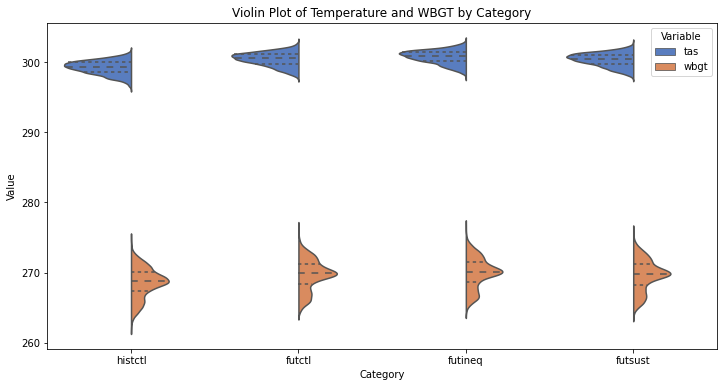

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn violin plot
plt.figure(figsize=(12, 6))  # Set the figure size

sns.violinplot(
    x="Category",    # Categories on the x-axis
    y="Value",       # Values on the y-axis
    hue="Variable",  # Separate violins by variable (temperature and wbgt)
    data=df,
    split=True,       # Split the violins by the "Variable" hue
    inner="quart",   # Show quartiles inside the violins
    palette="muted"  # Choose a color palette
)

# Customize the plot
plt.title("Violin Plot of Temperature and WBGT by Category")
plt.xlabel("Category")
plt.ylabel("Value")
plt.legend(title="Variable")


In [42]:
# Create a dictionary with variable names as keys and NumPy arrays as values
data_dict = {
    'tas_futctl-histctl': ds_TREFHT_ctl.values-ds_TREFHT_hist.values,
    'tas_futsust-futctl': ds_TREFHT_sust.values-ds_TREFHT_ctl.values,
    'tas_futineq-futctl': ds_TREFHT_ineq.values-ds_TREFHT_ctl.values,
    'tas_futsust-futineq': ds_TREFHT_sust.values-ds_TREFHT_ineq.values,
    'wbgt_futctl-histctl': ds_WBGT_ctl.values-ds_WBGT_hist.values,
    'wbgt_futsust-futineq': ds_WBGT_sust.values-ds_WBGT_ineq.values,
    'wbgt_futsust-futctl': ds_WBGT_sust.values-ds_WBGT_ctl.values,
    'wbgt_futineq-futctl': ds_WBGT_ineq.values-ds_WBGT_ctl.values,
}

# Initialize an empty list to store data
data = []

# Iterate through the data_dict and create rows for the DataFrame
for var_name, var_data_array in data_dict.items():
    category, variable = var_name.split('_')
    var_data = var_data_array  # Extract the numeric values
    data.extend(zip([category] * len(var_data), [variable] * len(var_data), var_data))

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=[ 'Variable','Category', 'Value'])

# Create a DataFrame from the dictionary
#df = pd.DataFrame(data_dict)
#df
# Add a 'Category' column to specify the category for each row
#df['Category'] = ['histctl', 'futctl', 'futineq', 'futsust'] * len(ds_TREFHT_hist) 

# Melt the DataFrame to have 'Variable' and 'Value' columns
#df = pd.melt(df, id_vars=['Category'], var_name='Variable', value_name='Value')


(-4.0, 4.0)

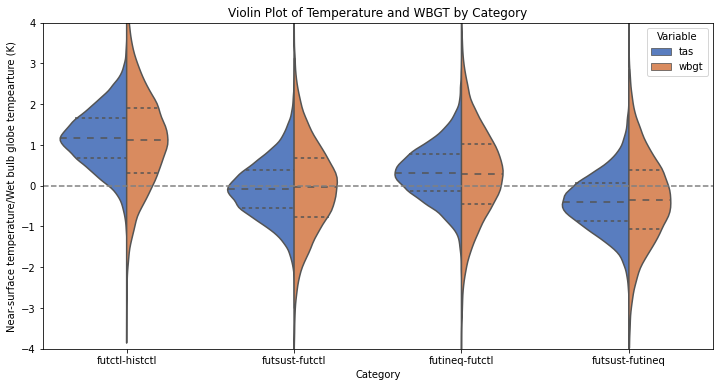

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn violin plot
plt.figure(figsize=(12, 6))  # Set the figure size

sns.violinplot(
    x="Category",    # Categories on the x-axis
    y="Value",       # Values on the y-axis
    hue="Variable",  # Separate violins by variable (temperature and wbgt)
    data=df,
    split=True,       # Split the violins by the "Variable" hue
    inner="quart",   # Show quartiles inside the violins
    palette="muted"  # Choose a color palette
)

# Customize the plot
plt.axhline(y=0, linestyle='--', color='gray')
plt.title("Violin Plot of Temperature and WBGT by Category")
plt.ylabel("Near-surface temperature/Wet bulb globe tempearture (K)")
plt.legend(title="Variable")
plt.ylim(-4,4)


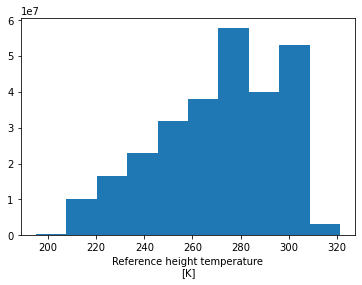

In [43]:
ds_TREFHT_ineq_1=open_da(var,'futineq',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).plot()

(array([1.91221564e+08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.07378600e+07]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

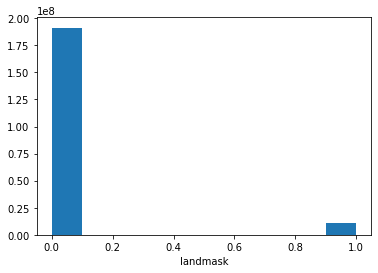

In [60]:
ds_TREFHT_hist_1=open_da(var,'hist',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:]
da_mask_trop=da_mask.fillna(0)
ds_TREFHT_hist_1=ds_TREFHT_hist_1.mean('time').where(da_mask_trop)
da_mask_broadcasted.plot()

In [61]:
print(da_mask_broadcasted)

<xarray.DataArray 'landmask' (time: 10957, lat: 136, lon: 192)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
   

In [28]:
ds_TREFHT_sust_1=open_da(var,'futsust',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].where(da_mask).mean(['lat','lon'])
print(ds_TREFHT_sust_1)
ds_TREFHT_sust_1=open_da(var,'futsust',esm,model,'001','h1')[time_slice_1[esm]:time_slice_2[esm],:,:].mean(['lat','lon'])
print(ds_TREFHT_sust_1)


<xarray.DataArray 'wbgt_daymax' (time: 10957)>
array([272.96531205, 272.99402552, 272.60363481, ..., 273.69344273,
       273.52163462, 273.21763291])
Coordinates:
  * time     (time) datetime64[ns] 2070-01-01 2070-01-02 ... 2099-12-31
<xarray.DataArray 'wbgt_daymax' (time: 10957)>
array([281.00092267, 280.97409641, 280.71342994, ..., 281.28473741,
       281.152402  , 281.02792951])
Coordinates:
  * time     (time) datetime64[ns] 2070-01-01 2070-01-02 ... 2099-12-31


In [27]:
#create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting

var='wbgt_daymean'
esm='ecearth'
mask='_trop_congo'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_hist_mean= pickle.load(f)

        #create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting


var='wbgt_daymax'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_hist_mean= pickle.load(f)

        #create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='tas_daymean'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_hist_mean= pickle.load(f)

        #create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='tas_daymax'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_hist_mean= pickle.load(f)


/readonly/dodrio/apps/RHEL8/zen2-ib/software/Seaborn/0.11.2-foss-2021b/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/readonly/dodrio/apps/RHEL8/zen2-ib/software/Seaborn/0.11.2-foss-2021b/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/readonly/dodrio/apps/RHEL8/zen2-ib/software/Seaborn/0.11.2-foss-2021b/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a

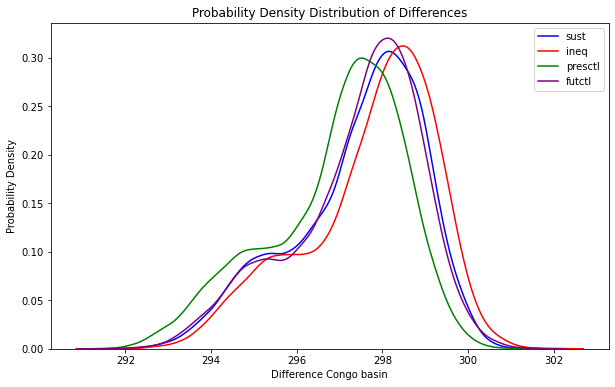

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.distplot(ds_TREFHTmean_sust_mean, kde=True, hist=False, label='sust', color='blue')
sns.distplot(ds_TREFHTmean_ineq_mean, kde=True, hist=False, label='ineq', color='red')

sns.distplot(ds_TREFHTmean_hist_mean, kde=True, hist=False, label='presctl', color='green')
sns.distplot(ds_TREFHTmean_ctl_mean, kde=True, hist=False, label='futctl', color='purple')

plt.xlabel('Difference Congo basin')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

/readonly/dodrio/apps/RHEL8/zen2-ib/software/Seaborn/0.11.2-foss-2021b/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/readonly/dodrio/apps/RHEL8/zen2-ib/software/Seaborn/0.11.2-foss-2021b/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/readonly/dodrio/apps/RHEL8/zen2-ib/software/Seaborn/0.11.2-foss-2021b/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a

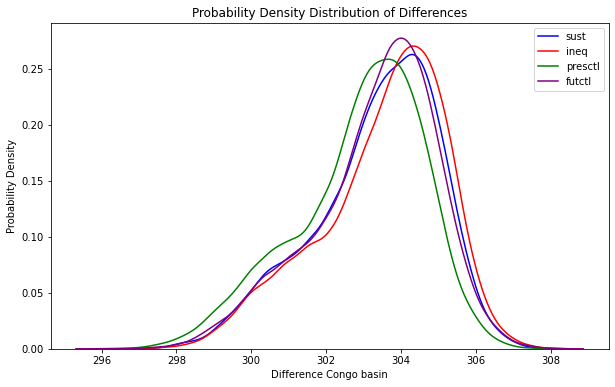

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.distplot(ds_TREFHTmax_sust_mean, kde=True, hist=False, label='sust', color='blue')
sns.distplot(ds_TREFHTmax_ineq_mean, kde=True, hist=False, label='ineq', color='red')

sns.distplot(ds_TREFHTmax_hist_mean, kde=True, hist=False, label='presctl', color='green')
sns.distplot(ds_TREFHTmax_ctl_mean, kde=True, hist=False, label='futctl', color='purple')

plt.xlabel('Difference Congo basin')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

/readonly/dodrio/apps/RHEL8/zen2-ib/software/Seaborn/0.11.2-foss-2021b/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/readonly/dodrio/apps/RHEL8/zen2-ib/software/Seaborn/0.11.2-foss-2021b/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/readonly/dodrio/apps/RHEL8/zen2-ib/software/Seaborn/0.11.2-foss-2021b/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a

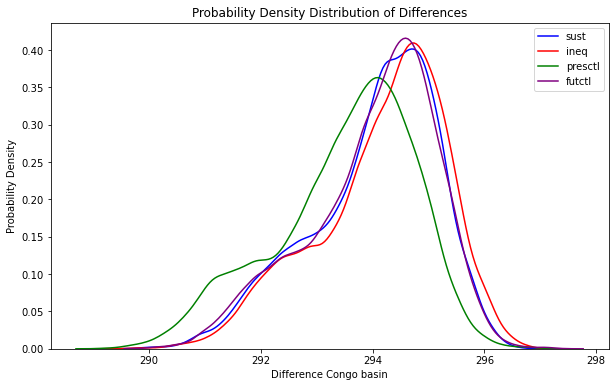

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.distplot(ds_wbgtmean_sust_mean, kde=True, hist=False, label='sust', color='blue')
sns.distplot(ds_wbgtmean_ineq_mean, kde=True, hist=False, label='ineq', color='red')

sns.distplot(ds_wbgtmean_hist_mean, kde=True, hist=False, label='presctl', color='green')
sns.distplot(ds_wbgtmean_ctl_mean, kde=True, hist=False, label='futctl', color='purple')

plt.xlabel('Difference Congo basin')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

/readonly/dodrio/apps/RHEL8/zen2-ib/software/Seaborn/0.11.2-foss-2021b/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/readonly/dodrio/apps/RHEL8/zen2-ib/software/Seaborn/0.11.2-foss-2021b/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/readonly/dodrio/apps/RHEL8/zen2-ib/software/Seaborn/0.11.2-foss-2021b/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a

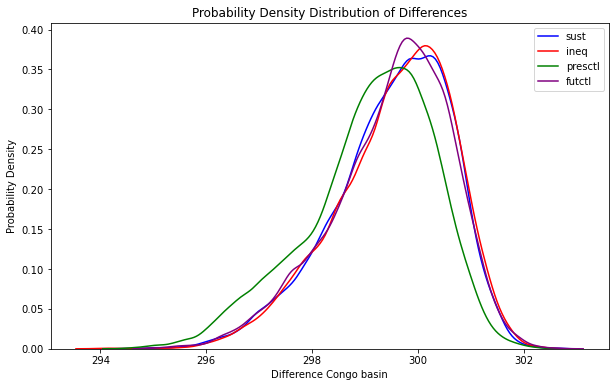

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.distplot(ds_wbgtmax_sust_mean, kde=True, hist=False, label='sust', color='blue')
sns.distplot(ds_wbgtmax_ineq_mean, kde=True, hist=False, label='ineq', color='red')

sns.distplot(ds_wbgtmax_hist_mean, kde=True, hist=False, label='presctl', color='green')
sns.distplot(ds_wbgtmax_ctl_mean, kde=True, hist=False, label='futctl', color='purple')

plt.xlabel('Difference Congo basin')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

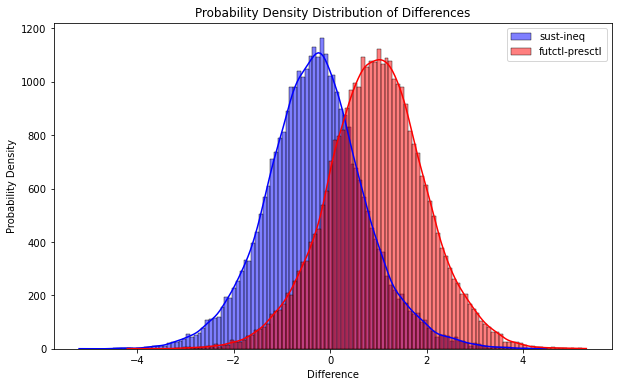

In [6]:
diff_lcc=ds_TREFHT_sust_mean-ds_TREFHT_ineq_mean
ds_TREFHT_hist_mean['time']=ds_TREFHT_ctl_mean['time']
diff_cc=ds_TREFHT_ctl_mean-ds_TREFHT_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


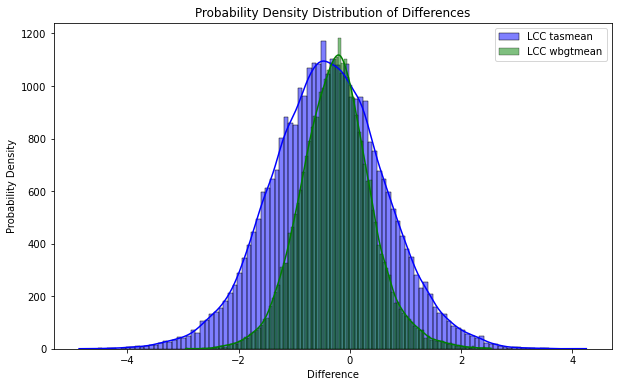

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
diff_lcc_TREFHTmean=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
diff_lcc_TREFHTmax=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
diff_lcc_wbgtmean=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
diff_lcc_wbgtmax=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc_TREFHTmean, kde=True, label='LCC tasmean', color='blue')
#sns.histplot(diff_lcc_TREFHTmax, kde=True, label='LCC tasmax', color='red')

sns.histplot(diff_lcc_wbgtmean, kde=True, label='LCC wbgtmean', color='green')
#sns.histplot(diff_lcc_wbgtmax, kde=True, label='LCC wbgtmax', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

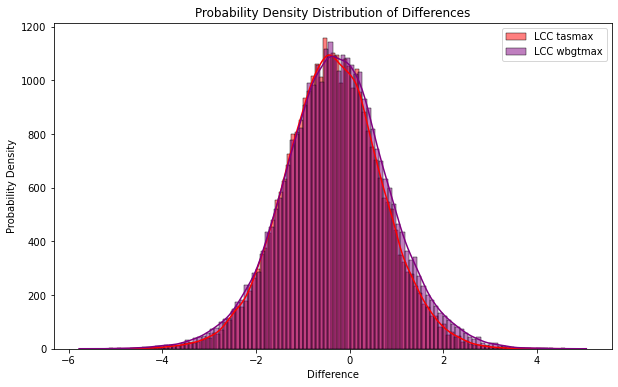

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
diff_lcc_TREFHTmean=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
diff_lcc_TREFHTmax=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
diff_lcc_wbgtmean=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
diff_lcc_wbgtmax=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

#sns.histplot(diff_lcc_TREFHTmean, kde=True, label='LCC tasmean', color='blue')
sns.histplot(diff_lcc_TREFHTmax, kde=True, label='LCC tasmax', color='red')

#sns.histplot(diff_lcc_wbgtmean, kde=True, label='LCC wbgtmean', color='green')
sns.histplot(diff_lcc_wbgtmax, kde=True, label='LCC wbgtmax', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

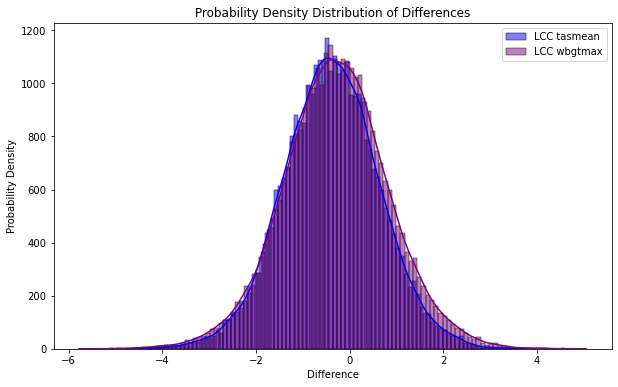

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
diff_lcc_TREFHTmean=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
diff_lcc_TREFHTmax=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
diff_lcc_wbgtmean=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
diff_lcc_wbgtmax=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc_TREFHTmean, kde=True, label='LCC tasmean', color='blue')
#sns.histplot(diff_lcc_TREFHTmax, kde=True, label='LCC tasmax', color='red')

#sns.histplot(diff_lcc_wbgtmean, kde=True, label='LCC wbgtmean', color='green')
sns.histplot(diff_lcc_wbgtmax, kde=True, label='LCC wbgtmax', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

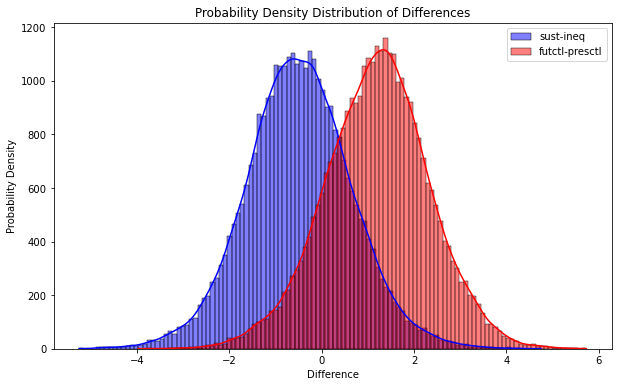

In [84]:
diff_lcc=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
ds_TREFHTmean_hist_mean['time']=ds_TREFHTmean_ctl_mean['time']
diff_cc=ds_TREFHTmean_ctl_mean-ds_TREFHTmean_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


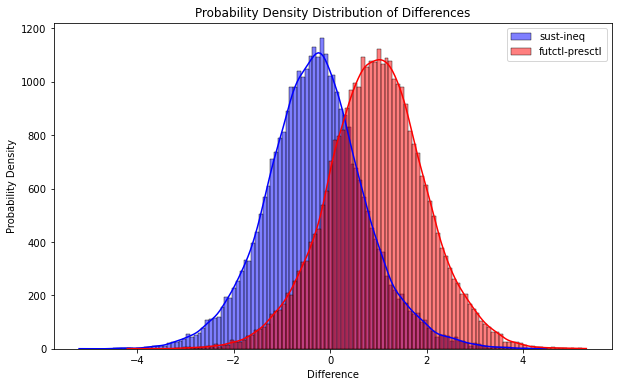

In [85]:
diff_lcc=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
ds_wbgtmean_hist_mean['time']=ds_wbgtmean_ctl_mean['time']
diff_cc=ds_wbgtmean_ctl_mean-ds_wbgtmean_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


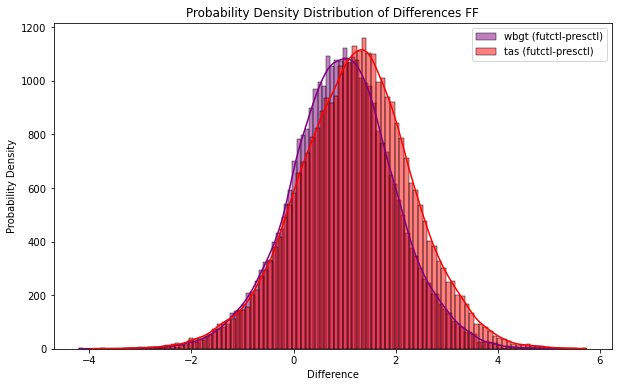

In [86]:
diff_lcc_wbgt=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
ds_wbgtmean_hist_mean['time']=ds_wbgtmean_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmean_ctl_mean-ds_wbgtmean_hist_mean
diff_lcc_TREFHT=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
ds_TREFHTmean_hist_mean['time']=ds_TREFHTmean_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmean_ctl_mean-ds_TREFHTmean_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

#sns.histplot(diff_lcc_wbgt, kde=True, label='sust-ineq', color='green')
sns.histplot(diff_cc_wbgt, kde=True, label='wbgt (futctl-presctl)', color='purple')
#sns.histplot(diff_lcc_TREFHT, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc_TREFHT, kde=True, label='tas (futctl-presctl)', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences FF')
plt.legend()


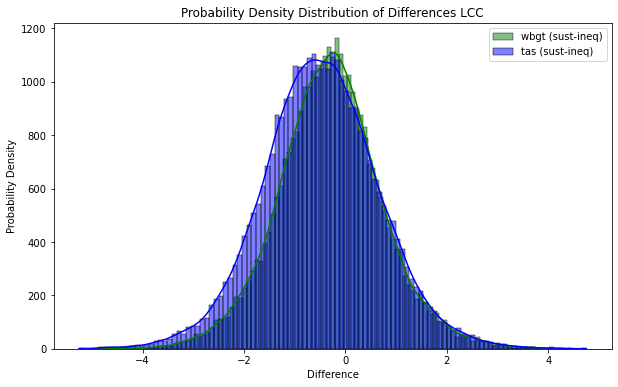

In [87]:
diff_lcc_wbgt=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
ds_wbgtmean_hist_mean['time']=ds_wbgtmean_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmean_ctl_mean-ds_wbgtmean_hist_mean
diff_lcc_TREFHT=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
ds_TREFHTmean_hist_mean['time']=ds_TREFHTmean_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmean_ctl_mean-ds_TREFHTmean_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc_wbgt, kde=True, label='wbgt (sust-ineq)', color='green')
#sns.histplot(diff_cc_wbgt, kde=True, label='futctl-presctl', color='purple')
sns.histplot(diff_lcc_TREFHT, kde=True, label='tas (sust-ineq)', color='blue')
#sns.histplot(diff_cc_TREFHT, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences LCC')
plt.legend()


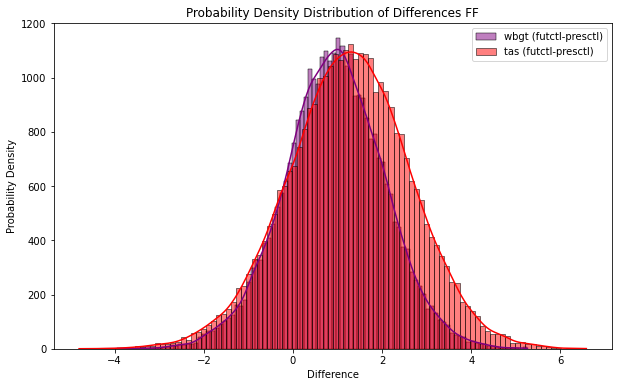

In [106]:
diff_lcc_wbgt=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean
ds_wbgtmax_hist_mean['time']=ds_wbgtmax_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmax_ctl_mean-ds_wbgtmax_hist_mean
diff_lcc_TREFHT=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
ds_TREFHTmax_hist_mean['time']=ds_TREFHTmax_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmax_ctl_mean-ds_TREFHTmax_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

#sns.histplot(diff_lcc_wbgt, kde=True, label='sust-ineq', color='green')
sns.histplot(diff_cc_wbgt, kde=True, label='wbgt (futctl-presctl)', color='purple')
#sns.histplot(diff_lcc_TREFHT, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc_TREFHT, kde=True, label='tas (futctl-presctl)', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences FF')
plt.legend()


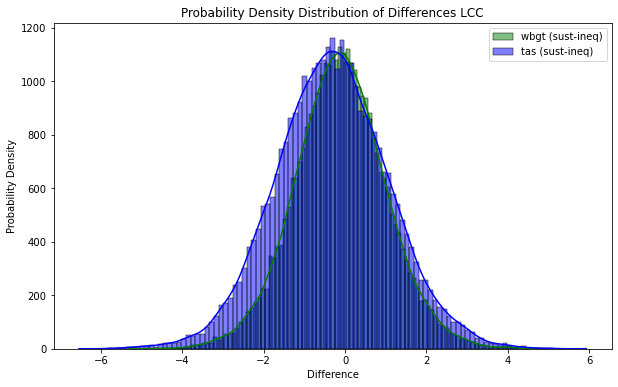

In [105]:
diff_lcc_wbgt=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean
ds_wbgtmax_hist_mean['time']=ds_wbgtmax_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmax_ctl_mean-ds_wbgtmax_hist_mean
diff_lcc_TREFHT=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
ds_TREFHTmax_hist_mean['time']=ds_TREFHTmax_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmax_ctl_mean-ds_TREFHTmax_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc_wbgt, kde=True, label='wbgt (sust-ineq)', color='green')
#sns.histplot(diff_cc_wbgt, kde=True, label='futctl-presctl', color='purple')
sns.histplot(diff_lcc_TREFHT, kde=True, label='tas (sust-ineq)', color='blue')
#sns.histplot(diff_cc_TREFHT, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences LCC')
plt.legend()


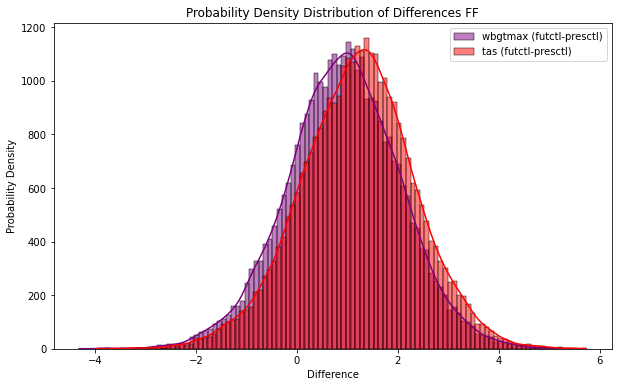

In [107]:
diff_lcc_wbgt=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean
ds_wbgtmax_hist_mean['time']=ds_wbgtmax_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmax_ctl_mean-ds_wbgtmax_hist_mean
diff_lcc_TREFHT=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
ds_TREFHTmean_hist_mean['time']=ds_TREFHTmean_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmean_ctl_mean-ds_TREFHTmean_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

#sns.histplot(diff_lcc_wbgt, kde=True, label='sust-ineq', color='green')
sns.histplot(diff_cc_wbgt, kde=True, label='wbgtmax (futctl-presctl)', color='purple')
#sns.histplot(diff_lcc_TREFHT, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc_TREFHT, kde=True, label='tas (futctl-presctl)', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences FF')
plt.legend()


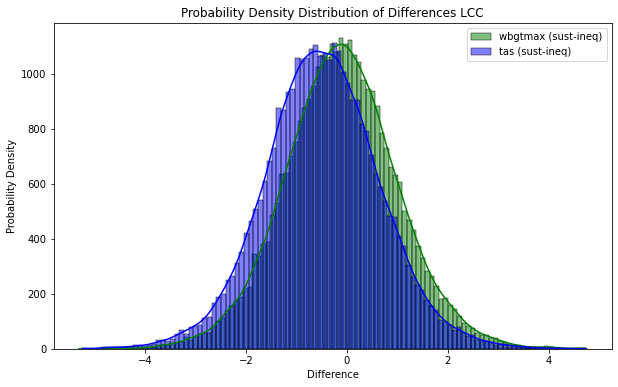

In [109]:
diff_lcc_wbgt=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean
ds_wbgtmax_hist_mean['time']=ds_wbgtmax_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmax_ctl_mean-ds_wbgtmax_hist_mean
diff_lcc_TREFHT=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
ds_TREFHTmean_hist_mean['time']=ds_TREFHTmean_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmean_ctl_mean-ds_TREFHTmean_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc_wbgt, kde=True, label='wbgtmax (sust-ineq)', color='green')
#sns.histplot(diff_cc_wbgt, kde=True, label='futctl-presctl', color='purple')
sns.histplot(diff_lcc_TREFHT, kde=True, label='tas (sust-ineq)', color='blue')
#sns.histplot(diff_cc_TREFHT, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences LCC')
plt.legend()


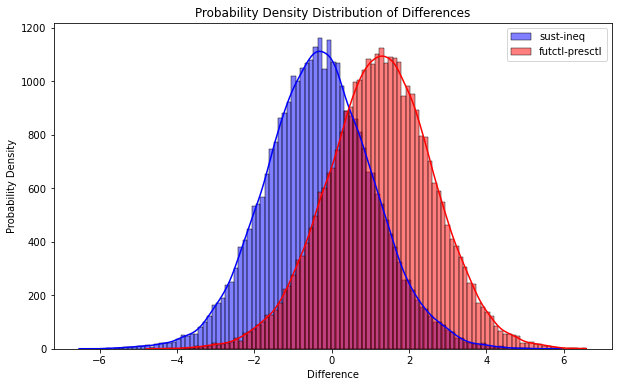

In [62]:
diff_lcc=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
ds_TREFHTmax_hist_mean['time']=ds_TREFHTmax_ctl_mean['time']
diff_cc=ds_TREFHTmax_ctl_mean-ds_TREFHTmax_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


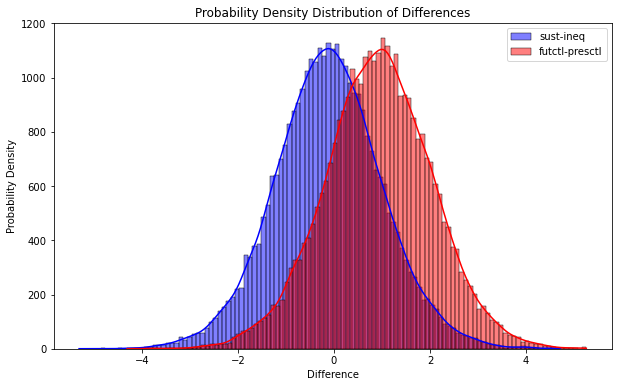

In [65]:
diff_lcc=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean
ds_wbgtmax_hist_mean['time']=ds_wbgtmax_ctl_mean['time']
diff_cc=ds_wbgtmax_ctl_mean-ds_wbgtmax_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


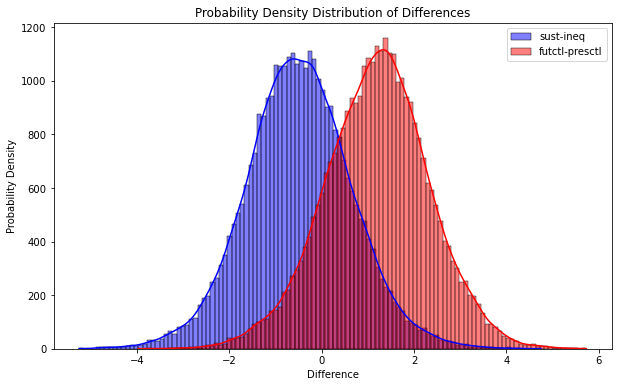

In [7]:
#create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='wbgt_daymax'
esm='cesm'
mask='_trop_congo'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_hist_mean= pickle.load(f)


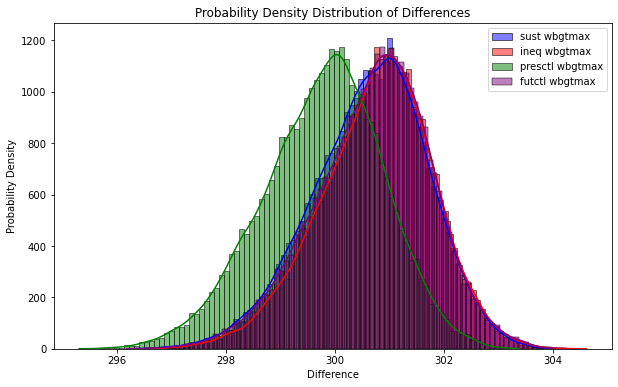

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(ds_TREFHT_sust_mean, kde=True, label='sust wbgtmax', color='blue')
sns.histplot(ds_TREFHT_ineq_mean, kde=True, label='ineq wbgtmax', color='red')

sns.histplot(ds_TREFHT_hist_mean, kde=True, label='presctl wbgtmax', color='green')
sns.histplot(ds_TREFHT_ctl_mean, kde=True, label='futctl wbgtmax', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

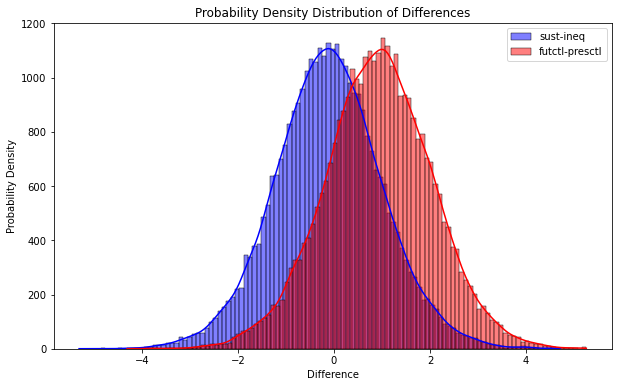

In [9]:
diff_lcc=ds_TREFHT_sust_mean-ds_TREFHT_ineq_mean
ds_TREFHT_hist_mean['time']=ds_TREFHT_ctl_mean['time']
diff_cc=ds_TREFHT_ctl_mean-ds_TREFHT_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


In [10]:
#create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='TREFHT_daymean'
esm='cesm'
mask='_trop_congo'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_hist_mean= pickle.load(f)


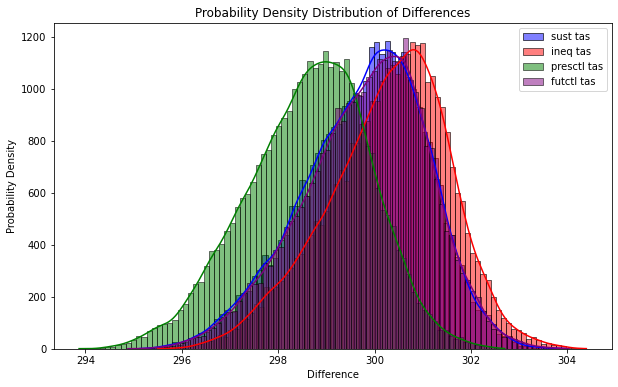

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(ds_TREFHT_sust_mean, kde=True, label='sust tas', color='blue')
sns.histplot(ds_TREFHT_ineq_mean, kde=True, label='ineq tas', color='red')

sns.histplot(ds_TREFHT_hist_mean, kde=True, label='presctl tas', color='green')
sns.histplot(ds_TREFHT_ctl_mean, kde=True, label='futctl tas', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

In [59]:
diff_lcc=ds_TREFHT_sust_mean-ds_TREFHT_ineq_mean
ds_TREFHT_hist_mean['time']=ds_TREFHT_ctl_mean['time']
diff_cc=ds_TREFHT_ctl_mean-ds_TREFHT_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


NameError: name 'ds_TREFHT_sust_mean' is not defined

In [13]:
#create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='TREFHT_daymean'
esm='cesm'
mask='_land'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_hist_mean= pickle.load(f)


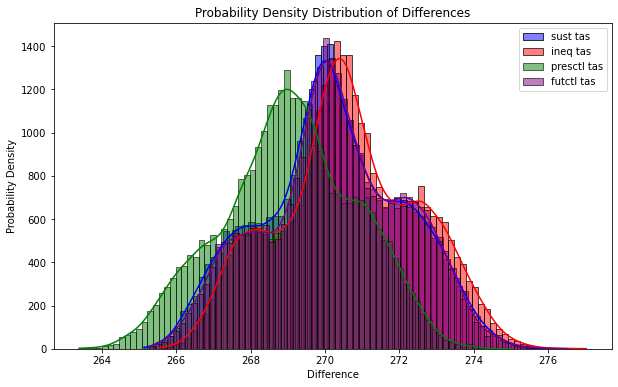

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(ds_TREFHT_sust_mean, kde=True, label='sust tas', color='blue')
sns.histplot(ds_TREFHT_ineq_mean, kde=True, label='ineq tas', color='red')

sns.histplot(ds_TREFHT_hist_mean, kde=True, label='presctl tas', color='green')
sns.histplot(ds_TREFHT_ctl_mean, kde=True, label='futctl tas', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

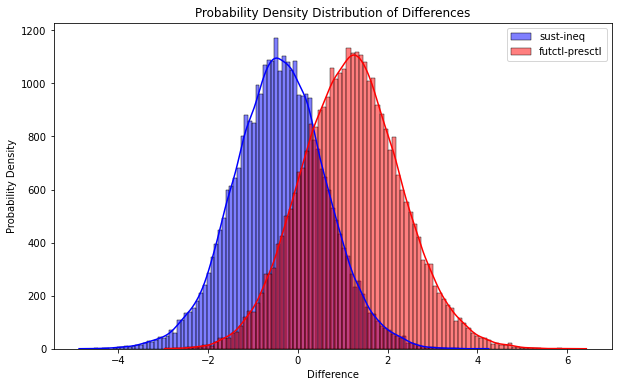

In [15]:
diff_lcc=ds_TREFHT_sust_mean-ds_TREFHT_ineq_mean
ds_TREFHT_hist_mean['time']=ds_TREFHT_ctl_mean['time']
diff_cc=ds_TREFHT_ctl_mean-ds_TREFHT_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


In [16]:
#create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='wbgt_daymax'
esm='cesm'
mask='_land'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_hist_mean= pickle.load(f)


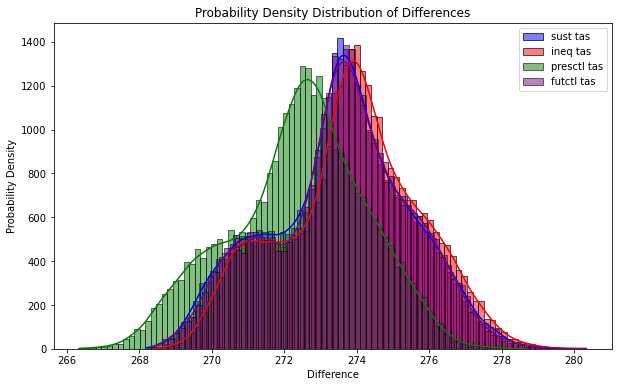

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(ds_TREFHT_sust_mean, kde=True, label='sust tas', color='blue')
sns.histplot(ds_TREFHT_ineq_mean, kde=True, label='ineq tas', color='red')

sns.histplot(ds_TREFHT_hist_mean, kde=True, label='presctl tas', color='green')
sns.histplot(ds_TREFHT_ctl_mean, kde=True, label='futctl tas', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

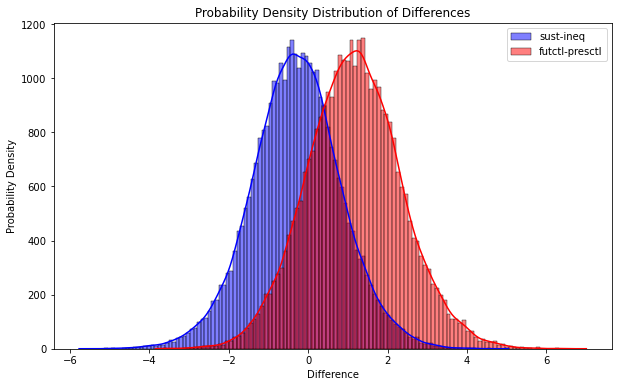

In [18]:
diff_lcc=ds_TREFHT_sust_mean-ds_TREFHT_ineq_mean
ds_TREFHT_hist_mean['time']=ds_TREFHT_ctl_mean['time']
diff_cc=ds_TREFHT_ctl_mean-ds_TREFHT_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


In [3]:
#create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='tas_daymean'
esm='ecearth'
mask='_trop_congo'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_hist_mean= pickle.load(f)


In [100]:
#create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='wbgt_daymean'
esm='ecearth'
mask='_trop_congo'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_hist_mean= pickle.load(f)

        #create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='wbgt_daymax'
esm='ecearth'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_hist_mean= pickle.load(f)

        #create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='tas_daymean'
esm='ecearth'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_hist_mean= pickle.load(f)

        #create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='tas_daymax'
esm='ecearth'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_hist_mean= pickle.load(f)


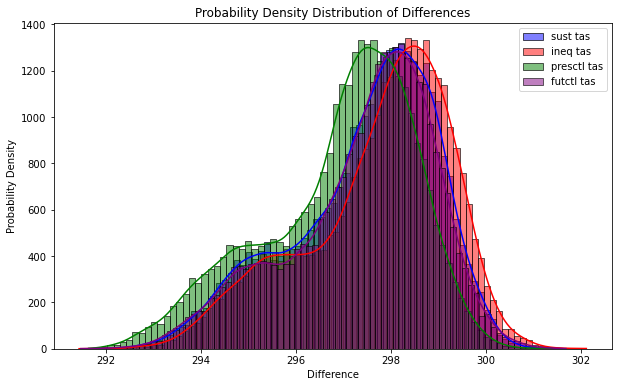

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(ds_TREFHT_sust_mean, kde=True, label='sust tas', color='blue')
sns.histplot(ds_TREFHT_ineq_mean, kde=True, label='ineq tas', color='red')

sns.histplot(ds_TREFHT_hist_mean, kde=True, label='presctl tas', color='green')
sns.histplot(ds_TREFHT_ctl_mean, kde=True, label='futctl tas', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

In [29]:
diff_lcc=ds_TREFHT_sust_mean-ds_TREFHT_ineq_mean
ds_TREFHT_hist_mean['time']=ds_TREFHT_ctl_mean['time']
diff_cc=ds_TREFHT_ctl_mean-ds_TREFHT_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


NameError: name 'ds_TREFHT_sust_mean' is not defined

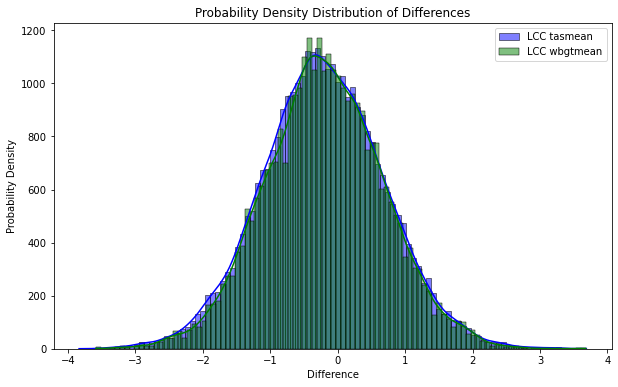

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
diff_lcc_TREFHTmean=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
diff_lcc_TREFHTmax=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
diff_lcc_wbgtmean=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
diff_lcc_wbgtmax=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc_TREFHTmean, kde=True, label='LCC tasmean', color='blue')
#sns.histplot(diff_lcc_TREFHTmax, kde=True, label='LCC tasmax', color='red')

sns.histplot(diff_lcc_wbgtmean, kde=True, label='LCC wbgtmean', color='green')
#sns.histplot(diff_lcc_wbgtmax, kde=True, label='LCC wbgtmax', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

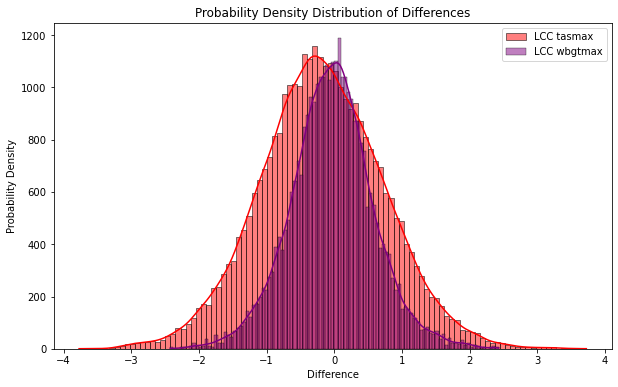

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
diff_lcc_TREFHTmean=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
diff_lcc_TREFHTmax=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
diff_lcc_wbgtmean=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
diff_lcc_wbgtmax=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

#sns.histplot(diff_lcc_TREFHTmean, kde=True, label='LCC tasmean', color='blue')
sns.histplot(diff_lcc_TREFHTmax, kde=True, label='LCC tasmax', color='red')

#sns.histplot(diff_lcc_wbgtmean, kde=True, label='LCC wbgtmean', color='green')
sns.histplot(diff_lcc_wbgtmax, kde=True, label='LCC wbgtmax', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

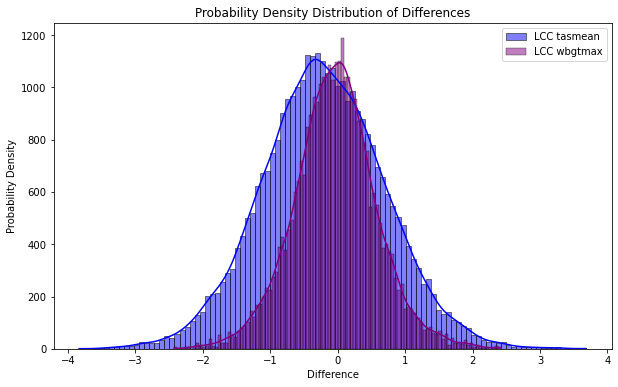

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
diff_lcc_TREFHTmean=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
diff_lcc_TREFHTmax=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
diff_lcc_wbgtmean=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
diff_lcc_wbgtmax=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc_TREFHTmean, kde=True, label='LCC tasmean', color='blue')
#sns.histplot(diff_lcc_TREFHTmax, kde=True, label='LCC tasmax', color='red')

#sns.histplot(diff_lcc_wbgtmean, kde=True, label='LCC wbgtmean', color='green')
sns.histplot(diff_lcc_wbgtmax, kde=True, label='LCC wbgtmax', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

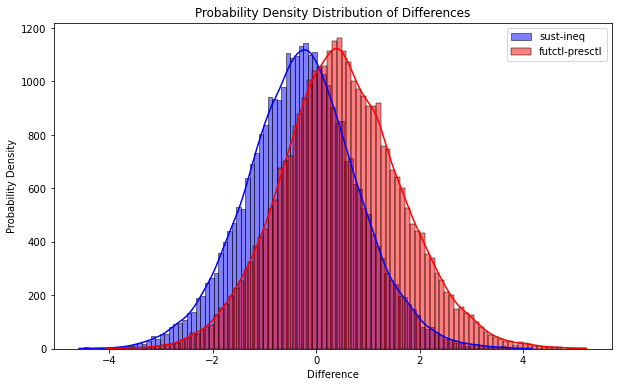

In [70]:
diff_lcc=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
ds_TREFHTmean_hist_mean['time']=ds_TREFHTmean_ctl_mean['time']
diff_cc=ds_TREFHTmean_ctl_mean-ds_TREFHTmean_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


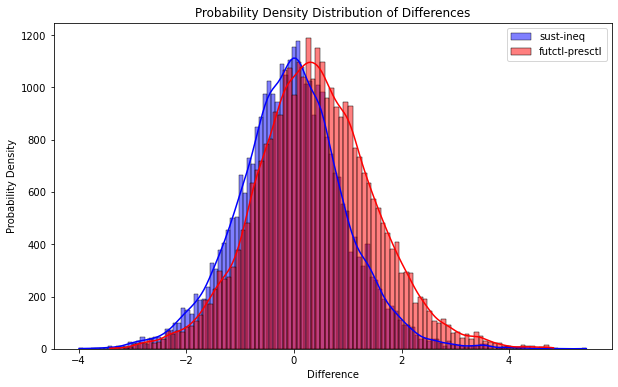

In [71]:
diff_lcc=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean
ds_wbgtmax_hist_mean['time']=ds_wbgtmax_ctl_mean['time']
diff_cc=ds_wbgtmax_ctl_mean-ds_wbgtmax_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


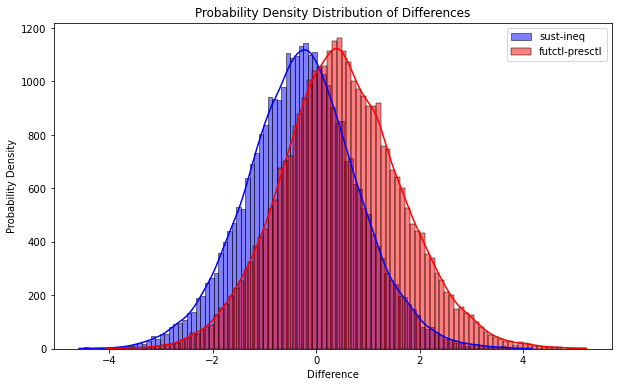

In [89]:
diff_lcc=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
ds_TREFHTmean_hist_mean['time']=ds_TREFHTmean_ctl_mean['time']
diff_cc=ds_TREFHTmean_ctl_mean-ds_TREFHTmean_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


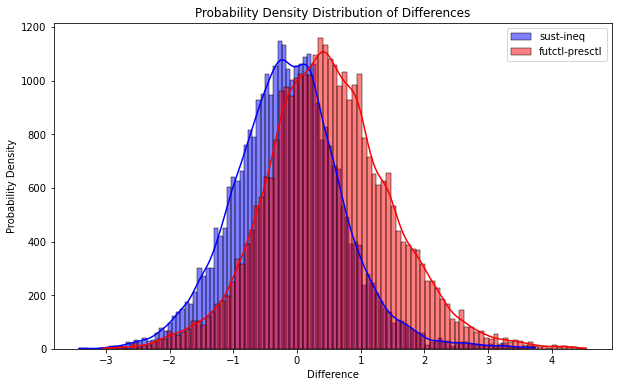

In [90]:
diff_lcc=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
ds_wbgtmean_hist_mean['time']=ds_wbgtmean_ctl_mean['time']
diff_cc=ds_wbgtmean_ctl_mean-ds_wbgtmean_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


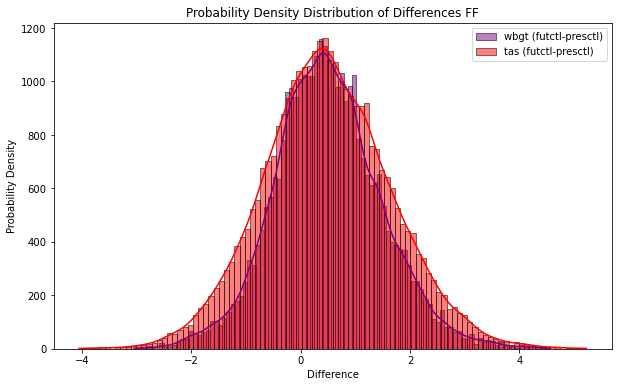

In [91]:
diff_lcc_wbgt=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
ds_wbgtmean_hist_mean['time']=ds_wbgtmean_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmean_ctl_mean-ds_wbgtmean_hist_mean
diff_lcc_TREFHT=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
ds_TREFHTmean_hist_mean['time']=ds_TREFHTmean_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmean_ctl_mean-ds_TREFHTmean_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

#sns.histplot(diff_lcc_wbgt, kde=True, label='sust-ineq', color='green')
sns.histplot(diff_cc_wbgt, kde=True, label='wbgt (futctl-presctl)', color='purple')
#sns.histplot(diff_lcc_TREFHT, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc_TREFHT, kde=True, label='tas (futctl-presctl)', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences FF')
plt.legend()


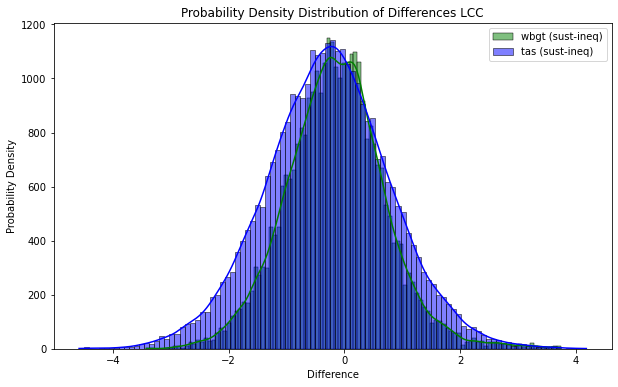

In [92]:
diff_lcc_wbgt=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
ds_wbgtmean_hist_mean['time']=ds_wbgtmean_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmean_ctl_mean-ds_wbgtmean_hist_mean
diff_lcc_TREFHT=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
ds_TREFHTmean_hist_mean['time']=ds_TREFHTmean_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmean_ctl_mean-ds_TREFHTmean_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc_wbgt, kde=True, label='wbgt (sust-ineq)', color='green')
#sns.histplot(diff_cc_wbgt, kde=True, label='futctl-presctl', color='purple')
sns.histplot(diff_lcc_TREFHT, kde=True, label='tas (sust-ineq)', color='blue')
#sns.histplot(diff_cc_TREFHT, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences LCC')
plt.legend()


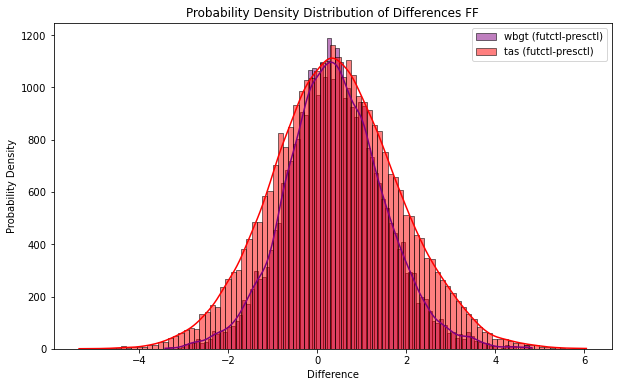

In [102]:
diff_lcc_wbgt=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean
ds_wbgtmax_hist_mean['time']=ds_wbgtmax_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmax_ctl_mean-ds_wbgtmax_hist_mean
diff_lcc_TREFHT=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
ds_TREFHTmax_hist_mean['time']=ds_TREFHTmax_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmax_ctl_mean-ds_TREFHTmax_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

#sns.histplot(diff_lcc_wbgt, kde=True, label='sust-ineq', color='green')
sns.histplot(diff_cc_wbgt, kde=True, label='wbgt (futctl-presctl)', color='purple')
#sns.histplot(diff_lcc_TREFHT, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc_TREFHT, kde=True, label='tas (futctl-presctl)', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences FF')
plt.legend()


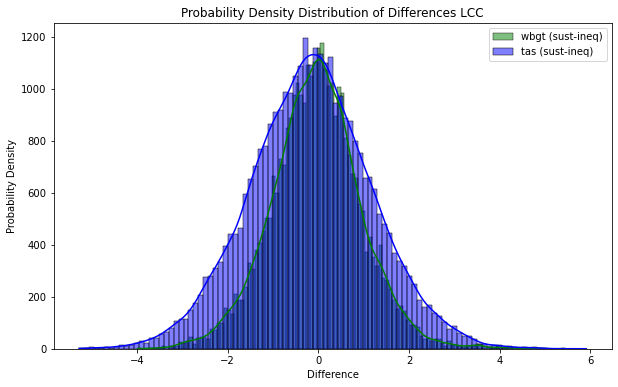

In [103]:
diff_lcc_wbgt=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean
ds_wbgtmax_hist_mean['time']=ds_wbgtmax_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmax_ctl_mean-ds_wbgtmax_hist_mean
diff_lcc_TREFHT=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
ds_TREFHTmax_hist_mean['time']=ds_TREFHTmax_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmax_ctl_mean-ds_TREFHTmax_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc_wbgt, kde=True, label='wbgt (sust-ineq)', color='green')
#sns.histplot(diff_cc_wbgt, kde=True, label='futctl-presctl', color='purple')
sns.histplot(diff_lcc_TREFHT, kde=True, label='tas (sust-ineq)', color='blue')
#sns.histplot(diff_cc_TREFHT, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences LCC')
plt.legend()


In [10]:
#create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='wbgt_daymax'
esm='ecearth'
mask='_trop_congo'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_hist_mean= pickle.load(f)


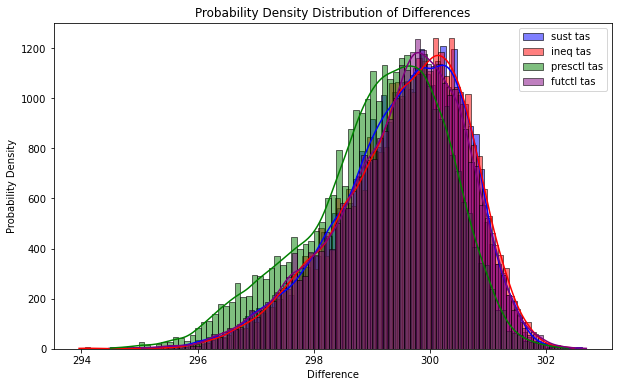

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(ds_TREFHT_sust_mean, kde=True, label='sust tas', color='blue')
sns.histplot(ds_TREFHT_ineq_mean, kde=True, label='ineq tas', color='red')

sns.histplot(ds_TREFHT_hist_mean, kde=True, label='presctl tas', color='green')
sns.histplot(ds_TREFHT_ctl_mean, kde=True, label='futctl tas', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

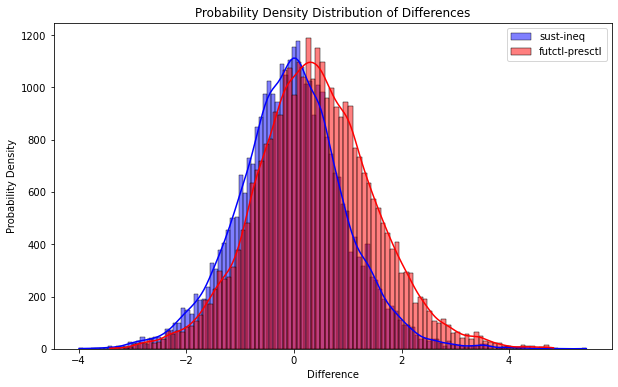

In [24]:
diff_lcc=ds_TREFHT_sust_mean-ds_TREFHT_ineq_mean
ds_TREFHT_hist_mean['time']=ds_TREFHT_ctl_mean['time']
diff_cc=ds_TREFHT_ctl_mean-ds_TREFHT_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


In [25]:
#create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='tas_daymean'
esm='mpiesm'
mask='_trop_congo'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_hist_mean= pickle.load(f)


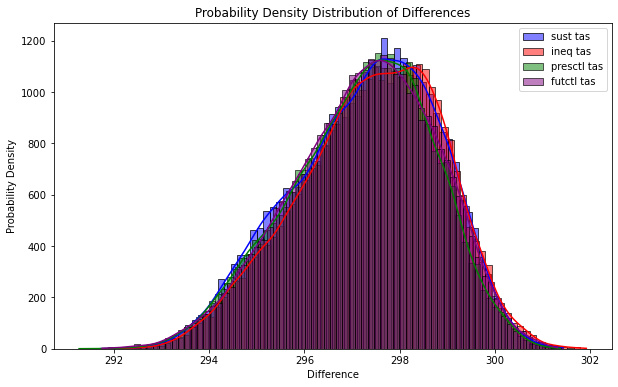

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(ds_TREFHT_sust_mean, kde=True, label='sust tas', color='blue')
sns.histplot(ds_TREFHT_ineq_mean, kde=True, label='ineq tas', color='red')

sns.histplot(ds_TREFHT_hist_mean, kde=True, label='presctl tas', color='green')
sns.histplot(ds_TREFHT_ctl_mean, kde=True, label='futctl tas', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

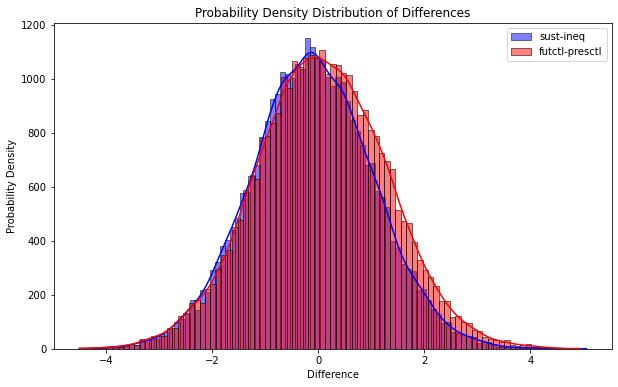

In [27]:
diff_lcc=ds_TREFHT_sust_mean-ds_TREFHT_ineq_mean
ds_TREFHT_hist_mean['time']=ds_TREFHT_ctl_mean['time']
diff_cc=ds_TREFHT_ctl_mean-ds_TREFHT_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


In [28]:
#create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='wbgt_daymax'
esm='mpiesm'
mask='_trop_congo'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHT_hist_mean= pickle.load(f)


In [93]:
#create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='wbgt_daymean'
esm='mpiesm'
mask='_trop_congo'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_hist_mean= pickle.load(f)

        #create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='wbgt_daymax'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_hist_mean= pickle.load(f)

        #create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='tas_daymean'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_hist_mean= pickle.load(f)

        #create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='tas_daymax'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_hist_mean= pickle.load(f)


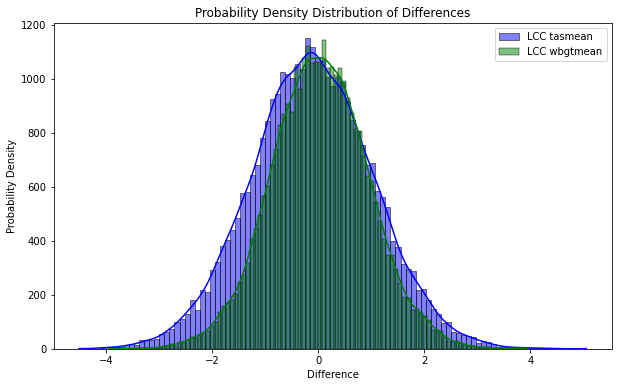

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
diff_lcc_TREFHTmean=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
diff_lcc_TREFHTmax=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
diff_lcc_wbgtmean=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
diff_lcc_wbgtmax=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc_TREFHTmean, kde=True, label='LCC tasmean', color='blue')
#sns.histplot(diff_lcc_TREFHTmax, kde=True, label='LCC tasmax', color='red')

sns.histplot(diff_lcc_wbgtmean, kde=True, label='LCC wbgtmean', color='green')
#sns.histplot(diff_lcc_wbgtmax, kde=True, label='LCC wbgtmax', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

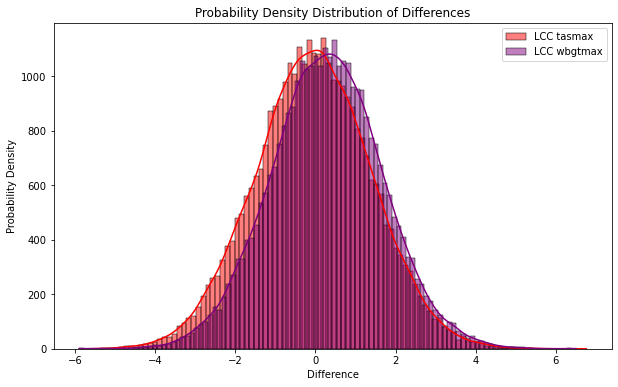

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
diff_lcc_TREFHTmean=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
diff_lcc_TREFHTmax=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
diff_lcc_wbgtmean=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
diff_lcc_wbgtmax=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

#sns.histplot(diff_lcc_TREFHTmean, kde=True, label='LCC tasmean', color='blue')
sns.histplot(diff_lcc_TREFHTmax, kde=True, label='LCC tasmax', color='red')

#sns.histplot(diff_lcc_wbgtmean, kde=True, label='LCC wbgtmean', color='green')
sns.histplot(diff_lcc_wbgtmax, kde=True, label='LCC wbgtmax', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

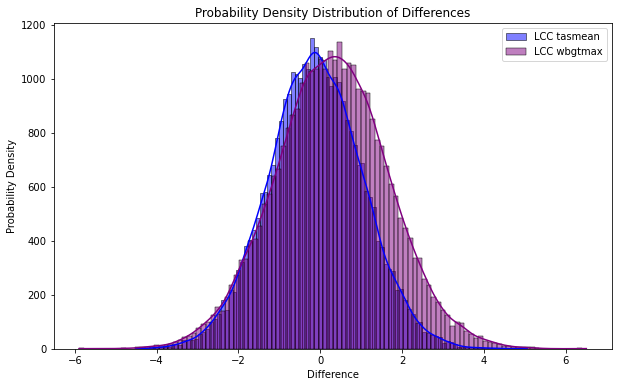

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
diff_lcc_TREFHTmean=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
diff_lcc_TREFHTmax=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
diff_lcc_wbgtmean=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
diff_lcc_wbgtmax=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc_TREFHTmean, kde=True, label='LCC tasmean', color='blue')
#sns.histplot(diff_lcc_TREFHTmax, kde=True, label='LCC tasmax', color='red')

#sns.histplot(diff_lcc_wbgtmean, kde=True, label='LCC wbgtmean', color='green')
sns.histplot(diff_lcc_wbgtmax, kde=True, label='LCC wbgtmax', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

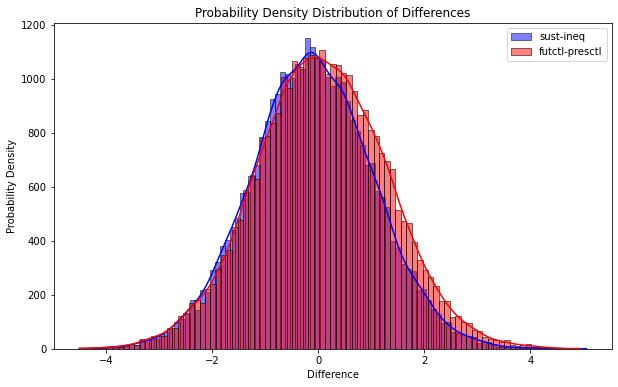

In [73]:
diff_lcc=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
ds_TREFHTmean_hist_mean['time']=ds_TREFHTmean_ctl_mean['time']
diff_cc=ds_TREFHTmean_ctl_mean-ds_TREFHTmean_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


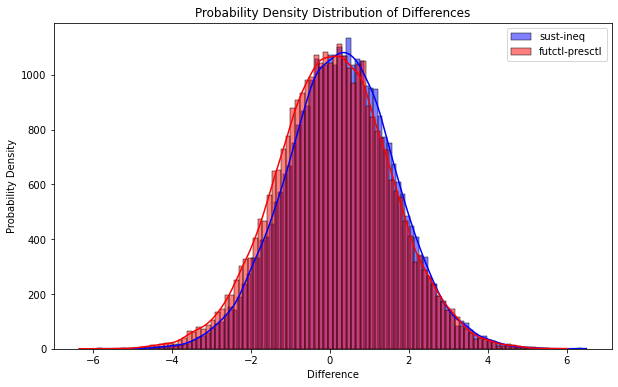

In [74]:
diff_lcc=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean
ds_wbgtmax_hist_mean['time']=ds_wbgtmax_ctl_mean['time']
diff_cc=ds_wbgtmax_ctl_mean-ds_wbgtmax_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


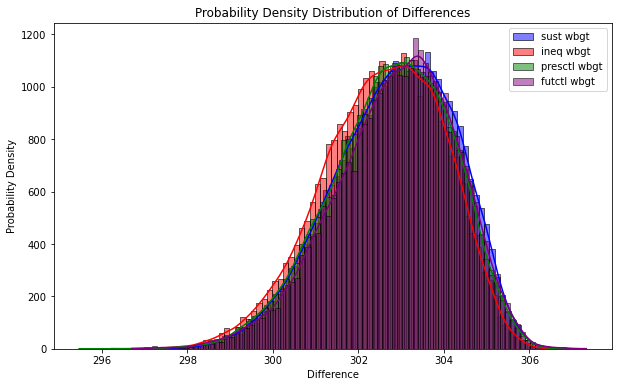

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(ds_TREFHT_sust_mean, kde=True, label='sust wbgt', color='blue')
sns.histplot(ds_TREFHT_ineq_mean, kde=True, label='ineq wbgt', color='red')

sns.histplot(ds_TREFHT_hist_mean, kde=True, label='presctl wbgt', color='green')
sns.histplot(ds_TREFHT_ctl_mean, kde=True, label='futctl wbgt', color='purple')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

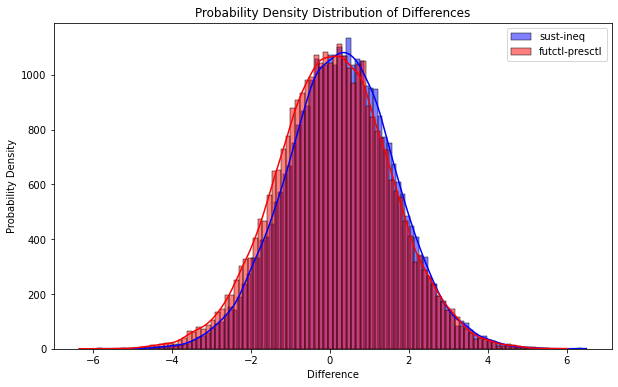

In [30]:
diff_lcc=ds_TREFHT_sust_mean-ds_TREFHT_ineq_mean
ds_TREFHT_hist_mean['time']=ds_TREFHT_ctl_mean['time']
diff_cc=ds_TREFHT_ctl_mean-ds_TREFHT_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


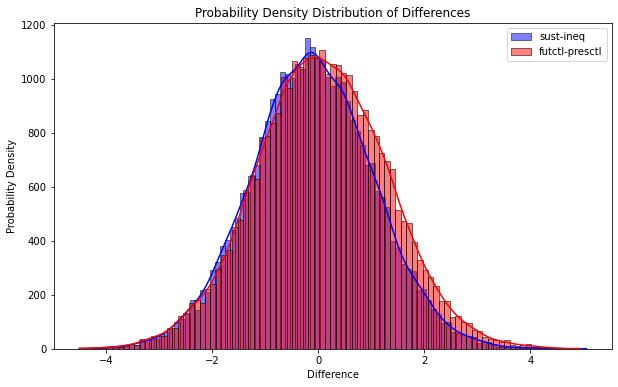

In [94]:
diff_lcc=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
ds_TREFHTmean_hist_mean['time']=ds_TREFHTmean_ctl_mean['time']
diff_cc=ds_TREFHTmean_ctl_mean-ds_TREFHTmean_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


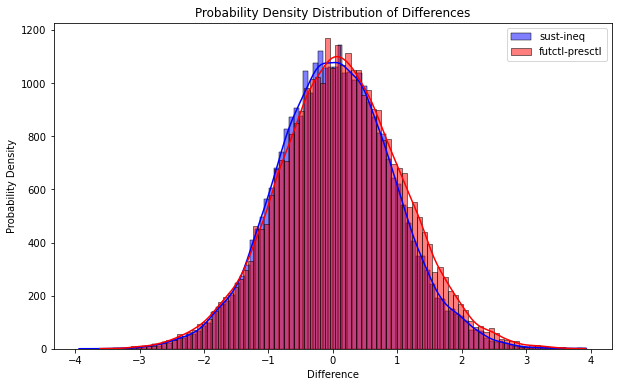

In [95]:
diff_lcc=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
ds_wbgtmean_hist_mean['time']=ds_wbgtmean_ctl_mean['time']
diff_cc=ds_wbgtmean_ctl_mean-ds_wbgtmean_hist_mean

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()


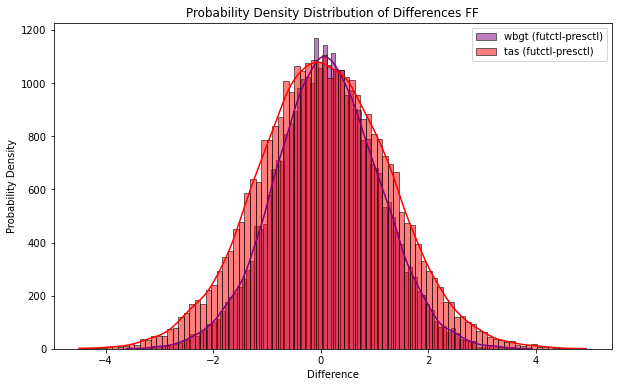

In [96]:
diff_lcc_wbgt=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
ds_wbgtmean_hist_mean['time']=ds_wbgtmean_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmean_ctl_mean-ds_wbgtmean_hist_mean
diff_lcc_TREFHT=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
ds_TREFHTmean_hist_mean['time']=ds_TREFHTmean_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmean_ctl_mean-ds_TREFHTmean_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

#sns.histplot(diff_lcc_wbgt, kde=True, label='sust-ineq', color='green')
sns.histplot(diff_cc_wbgt, kde=True, label='wbgt (futctl-presctl)', color='purple')
#sns.histplot(diff_lcc_TREFHT, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc_TREFHT, kde=True, label='tas (futctl-presctl)', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences FF')
plt.legend()


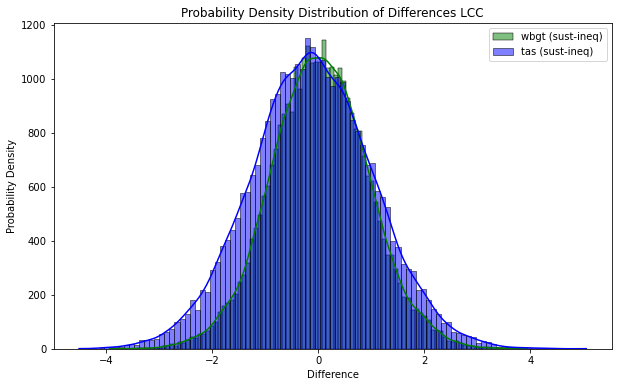

In [97]:
diff_lcc_wbgt=ds_wbgtmean_sust_mean-ds_wbgtmean_ineq_mean
ds_wbgtmean_hist_mean['time']=ds_wbgtmean_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmean_ctl_mean-ds_wbgtmean_hist_mean
diff_lcc_TREFHT=ds_TREFHTmean_sust_mean-ds_TREFHTmean_ineq_mean
ds_TREFHTmean_hist_mean['time']=ds_TREFHTmean_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmean_ctl_mean-ds_TREFHTmean_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc_wbgt, kde=True, label='wbgt (sust-ineq)', color='green')
#sns.histplot(diff_cc_wbgt, kde=True, label='futctl-presctl', color='purple')
sns.histplot(diff_lcc_TREFHT, kde=True, label='tas (sust-ineq)', color='blue')
#sns.histplot(diff_cc_TREFHT, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences LCC')
plt.legend()


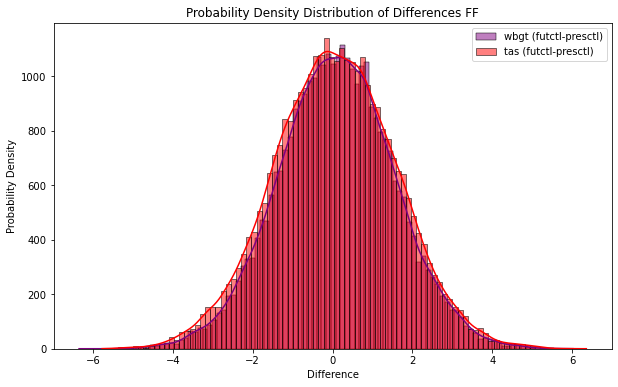

In [99]:
diff_lcc_wbgt=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean
ds_wbgtmax_hist_mean['time']=ds_wbgtmax_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmax_ctl_mean-ds_wbgtmax_hist_mean
diff_lcc_TREFHT=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
ds_TREFHTmax_hist_mean['time']=ds_TREFHTmax_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmax_ctl_mean-ds_TREFHTmax_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

#sns.histplot(diff_lcc_wbgt, kde=True, label='sust-ineq', color='green')
sns.histplot(diff_cc_wbgt, kde=True, label='wbgt (futctl-presctl)', color='purple')
#sns.histplot(diff_lcc_TREFHT, kde=True, label='sust-ineq', color='blue')
sns.histplot(diff_cc_TREFHT, kde=True, label='tas (futctl-presctl)', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences FF')
plt.legend()


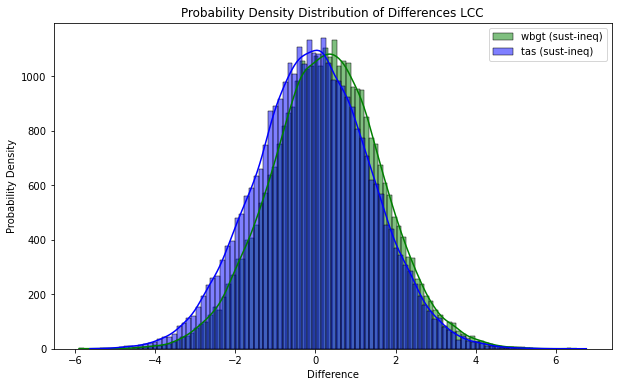

In [98]:
diff_lcc_wbgt=ds_wbgtmax_sust_mean-ds_wbgtmax_ineq_mean
ds_wbgtmax_hist_mean['time']=ds_wbgtmax_ctl_mean['time']
diff_cc_wbgt=ds_wbgtmax_ctl_mean-ds_wbgtmax_hist_mean
diff_lcc_TREFHT=ds_TREFHTmax_sust_mean-ds_TREFHTmax_ineq_mean
ds_TREFHTmax_hist_mean['time']=ds_TREFHTmax_ctl_mean['time']
diff_cc_TREFHT=ds_TREFHTmax_ctl_mean-ds_TREFHTmax_hist_mean
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_lcc_wbgt, kde=True, label='wbgt (sust-ineq)', color='green')
#sns.histplot(diff_cc_wbgt, kde=True, label='futctl-presctl', color='purple')
sns.histplot(diff_lcc_TREFHT, kde=True, label='tas (sust-ineq)', color='blue')
#sns.histplot(diff_cc_TREFHT, kde=True, label='futctl-presctl', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences LCC')
plt.legend()


In [5]:


ds_TREFHT_mpiesm_hist_1_mean=ds_TREFHT_mpiesm_hist_1.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_hist_2_mean=ds_TREFHT_mpiesm_hist_2.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_hist_3_mean=ds_TREFHT_mpiesm_hist_3.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_hist_mean=xr.concat([ds_TREFHT_mpiesm_hist_1_mean,ds_TREFHT_mpiesm_hist_2_mean,ds_TREFHT_mpiesm_hist_3_mean],'time')

# Save the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_hist_mpiesm.pkl', 'wb') as f:
    pickle.dump(ds_TREFHT_mpiesm_hist_mean, f)
    print('done')


ds_TREFHT_mpiesm_ctl_1_mean=ds_TREFHT_mpiesm_ctl_1.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_ctl_2_mean=ds_TREFHT_mpiesm_ctl_2.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_ctl_3_mean=ds_TREFHT_mpiesm_ctl_3.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_ctl_mean=xr.concat([ds_TREFHT_mpiesm_ctl_1_mean,ds_TREFHT_mpiesm_ctl_2_mean,ds_TREFHT_mpiesm_ctl_3_mean],'time')


# Save the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futctl_mpiesm.pkl', 'wb') as f:
    pickle.dump(ds_TREFHT_mpiesm_ctl_mean, f)
    print('done')
ds_TREFHT_mpiesm_sust_1_mean=ds_TREFHT_mpiesm_sust_1.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_sust_2_mean=ds_TREFHT_mpiesm_sust_2.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_sust_3_mean=ds_TREFHT_mpiesm_sust_3.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_sust_mean=xr.concat([ds_TREFHT_mpiesm_sust_1_mean,ds_TREFHT_mpiesm_sust_2_mean,ds_TREFHT_mpiesm_sust_3_mean],'time')

# Save the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futsust_mpiesm.pkl', 'wb') as f:
    pickle.dump(ds_TREFHT_mpiesm_sust_mean, f)
    print('done')
    
ds_TREFHT_mpiesm_ineq_1_mean=ds_TREFHT_mpiesm_ineq_1.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_ineq_2_mean=ds_TREFHT_mpiesm_ineq_2.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_ineq_3_mean=ds_TREFHT_mpiesm_ineq_3.mean(['lat','lon'])[-30*30:]
ds_TREFHT_mpiesm_ineq_mean=xr.concat([ds_TREFHT_mpiesm_ineq_1_mean,ds_TREFHT_mpiesm_ineq_2_mean,ds_TREFHT_mpiesm_ineq_3_mean],'time')

# Save the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futineq_mpiesm.pkl', 'wb') as f:
    pickle.dump(ds_TREFHT_mpiesm_ineq_mean, f)
    print('done')

done
done
done
done


In [ ]:
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futineq_mpiesm.pkl', 'rb') as f:
     ds_TREFHT_mpiesm_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futsust_mpiesm.pkl', 'rb') as f:
     ds_TREFHT_mpiesm_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futctl_mpiesm.pkl', 'rb') as f:
     ds_TREFHT_mpiesm_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_hist_mpiesm.pkl', 'rb') as f:
     ds_TREFHT_mpiesm_hist_mean= pickle.load(f)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

diff_CC = ds_TREFHT_mpiesm_ctl_mean.values - ds_TREFHT_mpiesm_hist_mean.values
diff_LCC = ds_TREFHT_mpiesm_sust_mean.values - ds_TREFHT_mpiesm_ineq_mean.values

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_CC, kde=True, label='Diff CC', color='blue')
sns.histplot(diff_LCC, kde=True, label='Diff LCC', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

NameError: name 'ds_TREFHT_mpiesm_ctl_mean' is not defined

In [4]:
#compute spatial means (global and/or regional)



#ds_TREFHT_ecearth_hist_1=open_da('wbgt_daymean','hist','ecearth','cam','001','h1')
#ds_TREFHT_ecearth_hist_2=open_da('wbgt_daymean','hist','ecearth','cam','002','h1')
#ds_TREFHT_ecearth_hist_3=open_da('wbgt_daymean','hist','ecearth','cam','003','h1')

ds_TREFHT_ecearth_ctl_1=open_da('wbgt_daymean','futctl','ecearth','cam','001','h1')[-30*30:,:,:]
print(ds_TREFHT_ecearth_ctl_1)
ds_TREFHT_ecearth_ctl_2=open_da('wbgt_daymean','futctl','ecearth','cam','002','h1')[-30*30:,:,:]
ds_TREFHT_ecearth_ctl_3=open_da('wbgt_daymean','futctl','ecearth','cam','003','h1')[-30*30:,:,:]

ds_TREFHT_ecearth_sust_1=open_da('wbgt_daymean','futsust','ecearth','cam','001','h1')[-30*30:,:,:]
ds_TREFHT_ecearth_sust_2=open_da('wbgt_daymean','futsust','ecearth','cam','002','h1')[-30*30:,:,:]
ds_TREFHT_ecearth_sust_3=open_da('wbgt_daymean','futsust','ecearth','cam','003','h1')[-30*30:,:,:]

ds_TREFHT_ecearth_ineq_1=open_da('wbgt_daymean','futineq','ecearth','cam','001','h1')[-30*30:,:,:]
ds_TREFHT_ecearth_ineq_2=open_da('wbgt_daymean','futineq','ecearth','cam','002','h1')[-30*30:,:,:]
ds_TREFHT_ecearth_ineq_3=open_da('wbgt_daymean','futineq','ecearth','cam','003','h1')[-30*30:,:,:]


#ds_TREFHT_ecearth_hist_1_mean=ds_TREFHT_ecearth_hist_1.mean(['lat','lon'])[-30*30:]
#ds_TREFHT_ecearth_hist_2_mean=ds_TREFHT_ecearth_hist_2.mean(['lat','lon'])[-30*30:]
#ds_TREFHT_ecearth_hist_3_mean=ds_TREFHT_ecearth_hist_3.mean(['lat','lon'])[-30*30:]

#ds_TREFHT_ecearth_hist_mean=xr.concat([ds_TREFHT_ecearth_hist_1_mean,ds_TREFHT_ecearth_hist_2_mean,ds_TREFHT_ecearth_hist_3_mean],'time')
#with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_hist_ecearth.pkl', 'wb') as f:
#    pickle.dump(ds_TREFHT_ecearth_hist_mean, f)
#    print('done')

ds_TREFHT_ecearth_ctl_1_mean=ds_TREFHT_ecearth_ctl_1.mean(['lat','lon'])
ds_TREFHT_ecearth_ctl_2_mean=ds_TREFHT_ecearth_ctl_2.mean(['lat','lon'])
ds_TREFHT_ecearth_ctl_3_mean=ds_TREFHT_ecearth_ctl_3.mean(['lat','lon'])
ds_TREFHT_ecearth_ctl_mean=xr.concat([ds_TREFHT_ecearth_ctl_1_mean,ds_TREFHT_ecearth_ctl_2_mean,ds_TREFHT_ecearth_ctl_3_mean],'time')
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futctl_ecearth.pkl', 'wb') as f:
    pickle.dump(ds_TREFHT_ecearth_ctl_mean, f)
    print('done')
    
ds_TREFHT_ecearth_sust_1_mean=ds_TREFHT_ecearth_sust_1.mean(['lat','lon'])
ds_TREFHT_ecearth_sust_2_mean=ds_TREFHT_ecearth_sust_2.mean(['lat','lon'])
ds_TREFHT_ecearth_sust_3_mean=ds_TREFHT_ecearth_sust_3.mean(['lat','lon'])
ds_TREFHT_ecearth_sust_mean=xr.concat([ds_TREFHT_ecearth_sust_1_mean,ds_TREFHT_ecearth_sust_2_mean,ds_TREFHT_ecearth_sust_3_mean],'time')
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futsust_ecearth.pkl', 'wb') as f:
    pickle.dump(ds_TREFHT_ecearth_sust_mean, f)
    print('done')

ds_TREFHT_ecearth_ineq_1_mean=ds_TREFHT_ecearth_ineq_1.mean(['lat','lon'])
ds_TREFHT_ecearth_ineq_2_mean=ds_TREFHT_ecearth_ineq_2.mean(['lat','lon'])
ds_TREFHT_ecearth_ineq_3_mean=ds_TREFHT_ecearth_ineq_3.mean(['lat','lon'])
ds_TREFHT_ecearth_ineq_mean=xr.concat([ds_TREFHT_ecearth_ineq_1_mean,ds_TREFHT_ecearth_ineq_2_mean,ds_TREFHT_ecearth_ineq_3_mean],'time')

# Save the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futineq_ecearth.pkl', 'wb') as f:
    pickle.dump(ds_TREFHT_ecearth_ineq_mean, f)
    print('done')



<xarray.DataArray 'wbgt_daymean' (time: 900, lat: 256, lon: 512)>
[117964800 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2097-07-15T10:00:00 ... 2099-12-31T10:00:00
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
Attributes:
    cell_methods:  time: mean
done
done
done


In [5]:
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futineq_ecearth.pkl', 'rb') as f:
     ds_TREFHT_ecearth_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futsust_ecearth.pkl', 'rb') as f:
     ds_TREFHT_ecearth_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futctl_ecearth.pkl', 'rb') as f:
     ds_TREFHT_ecearth_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_hist_ecearth.pkl', 'rb') as f:
     ds_TREFHT_ecearth_hist_mean= pickle.load(f)


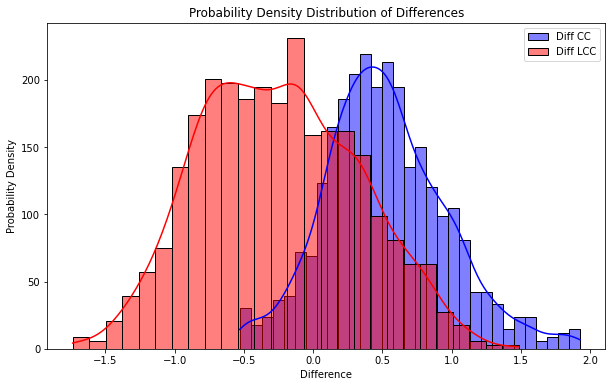

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

diff_CC = ds_TREFHT_ecearth_ctl_mean.values - ds_TREFHT_ecearth_hist_mean.values
diff_LCC = ds_TREFHT_ecearth_sust_mean.values - ds_TREFHT_ecearth_ineq_mean.values

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_CC, kde=True, label='Diff CC', color='blue')
sns.histplot(diff_LCC, kde=True, label='Diff LCC', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

In [3]:


#ds_TREFHT_hist_1=open_da('wbgt_daymean','hist','cesm','clm2','001','h1')
#ds_TREFHT_hist_2=open_da('wbgt_daymean','hist','cesm','clm2','002','h1')
#ds_TREFHT_hist_3=open_da('wbgt_daymean','hist','cesm','clm2','003','h1')

#ds_TREFHT_ctl_1=open_da('wbgt_daymean','futctl','cesm','clm2','001','h1')
#ds_TREFHT_ctl_2=open_da('wbgt_daymean','futctl','cesm','clm2','002','h1')
#ds_TREFHT_ctl_3=open_da('wbgt_daymean','futctl','cesm','clm2','003','h1')

#ds_TREFHT_sust_1=open_da('wbgt_daymean','futsust','cesm','clm2','001','h1')
#ds_TREFHT_sust_2=open_da('wbgt_daymean','futsust','cesm','clm2','002','h1')
#ds_TREFHT_sust_3=open_da('wbgt_daymean','futsust','cesm','clm2','003','h1')

ds_TREFHT_ineq_1=open_da('wbgt_daymean','futineq','cesm','clm2','001','h1')
ds_TREFHT_ineq_2=open_da('wbgt_daymean','futineq','cesm','clm2','002','h1')
ds_TREFHT_ineq_3=open_da('wbgt_daymean','futineq','cesm','clm2','003','h1')



#ds_TREFHT_hist_1_mean=ds_TREFHT_hist_1.mean(['lat','lon'])[-30*30-1:-1]
#ds_TREFHT_hist_2_mean=ds_TREFHT_hist_2.mean(['lat','lon'])[-30*30-1:-1]
#ds_TREFHT_hist_3_mean=ds_TREFHT_hist_3.mean(['lat','lon'])[-30*30-1:-1]
#ds_TREFHT_hist_mean=xr.concat([ds_TREFHT_hist_1_mean,ds_TREFHT_hist_2_mean,ds_TREFHT_hist_3_mean],'time')
#with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_hist_cesm.pkl', 'wb') as f:
#    pickle.dump(ds_TREFHT_hist_mean, f)
#    print('done')

#ds_TREFHT_ctl_1_mean=ds_TREFHT_ctl_1.mean(['lat','lon'])[-30*30-1:-1]
#ds_TREFHT_ctl_2_mean=ds_TREFHT_ctl_2.mean(['lat','lon'])[-30*30-1:-1]
#ds_TREFHT_ctl_3_mean=ds_TREFHT_ctl_3.mean(['lat','lon'])[-30*30-1:-1]
#ds_TREFHT_ctl_mean=xr.concat([ds_TREFHT_ctl_1_mean,ds_TREFHT_ctl_2_mean,ds_TREFHT_ctl_3_mean],'time')
#with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futctl_cesm.pkl', 'wb') as f:
#    pickle.dump(ds_TREFHT_ctl_mean, f)
#    print('done')

#ds_TREFHT_sust_1_mean=ds_TREFHT_sust_1.mean(['lat','lon'])[-30*30-1:-1]
#ds_TREFHT_sust_2_mean=ds_TREFHT_sust_2.mean(['lat','lon'])[-30*30-1:-1]
#ds_TREFHT_sust_3_mean=ds_TREFHT_sust_3.mean(['lat','lon'])[-30*30-1:-1]
#ds_TREFHT_sust_mean=xr.concat([ds_TREFHT_sust_1_mean,ds_TREFHT_sust_2_mean,ds_TREFHT_sust_3_mean],'time')
#with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futsust_cesm.pkl', 'wb') as f:
#    pickle.dump(ds_TREFHT_sust_mean, f)
#    print('done')

ds_TREFHT_ineq_1_mean=ds_TREFHT_ineq_1.mean(['lat','lon'])[-30*30-1:-1]
ds_TREFHT_ineq_2_mean=ds_TREFHT_ineq_2.mean(['lat','lon'])[-30*30-1:-1]
ds_TREFHT_ineq_3_mean=ds_TREFHT_ineq_3.mean(['lat','lon'])[-30*30-1:-1]
ds_TREFHT_ineq_mean=xr.concat([ds_TREFHT_ineq_1_mean,ds_TREFHT_ineq_2_mean,ds_TREFHT_ineq_3_mean],'time')
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futineq_cesm.pkl', 'wb') as f:
    pickle.dump(ds_TREFHT_ineq_mean, f)
    print('done')

done


In [4]:
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futineq_cesm.pkl', 'rb') as f:
     ds_TREFHT_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futsust_cesm.pkl', 'rb') as f:
     ds_TREFHT_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_futctl_cesm.pkl', 'rb') as f:
     ds_TREFHT_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/wbgt_daymean_hist_cesm.pkl', 'rb') as f:
     ds_TREFHT_hist_mean= pickle.load(f)


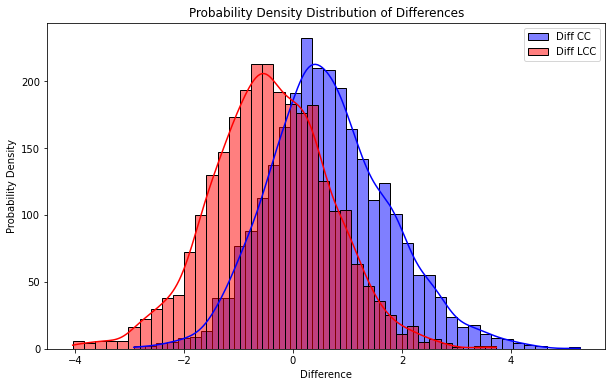

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

diff_CC = ds_TREFHT_ctl_mean.values - ds_TREFHT_hist_mean.values
diff_LCC = ds_TREFHT_sust_mean.values - ds_TREFHT_ineq_mean.values

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.histplot(diff_CC, kde=True, label='Diff CC', color='blue')
sns.histplot(diff_LCC, kde=True, label='Diff LCC', color='red')

plt.xlabel('Difference')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Differences')
plt.legend()

In [ ]:
# test values for the bw_method option ('None' is the default value)
bw_values =  [None, 0.1, 0.01]

# generate a list of kde estimators for each bw
#kde = [scipy.stats.gaussian_kde(ds_TREFHT_ecearth_sust_1.values,bw_method=bw) for bw in bw_values]


# plot (normalized) histogram of the data
plt.hist(ds_TREFHT_ctl_mean.values-ds_TREFHT_hist_mean.values, 50, facecolor='red', alpha=0.5);
plt.hist(ds_TREFHT_ineq_mean.values-ds_TREFHT_sust_mean.values, 50, facecolor='green', alpha=0.5);


In [ ]:
# test values for the bw_method option ('None' is the default value)
bw_values =  [None, 0.1, 0.01]

# generate a list of kde estimators for each bw
#kde = [scipy.stats.gaussian_kde(ds_TREFHT_ecearth_sust_1.values,bw_method=bw) for bw in bw_values]


# plot (normalized) histogram of the data
plt.hist(ds_TREFHT_mpiesm_ctl_mean.values-ds_TREFHT_mpiesm_hist_mean.values, 50, facecolor='red', alpha=0.5);
plt.hist(ds_TREFHT_mpiesm_ineq_mean.values-ds_TREFHT_mpiesm_sust_mean.values, 50, facecolor='green', alpha=0.5);


In [ ]:
# test values for the bw_method option ('None' is the default value)
bw_values =  [None, 0.1, 0.01]

# generate a list of kde estimators for each bw
#kde = [scipy.stats.gaussian_kde(ds_TREFHT_ecearth_sust_1.values,bw_method=bw) for bw in bw_values]


# plot (normalized) histogram of the data
plt.hist(ds_TREFHT_ecearth_ctl_mean.values-ds_TREFHT_ecearth_hist_mean.values, 50, facecolor='red', alpha=0.5);
plt.hist(ds_TREFHT_ecearth_ineq_mean.values-ds_TREFHT_ecearth_sust_mean.values, 50, facecolor='green', alpha=0.5);


In [5]:
import pickle
import pandas as pd
esm='cesm'
mask='_trop'
var='wbgt_daymean'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmean_hist_mean= pickle.load(f)

        #create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting


var='wbgt_daymax'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_wbgtmax_hist_mean= pickle.load(f)

        #create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='tas_daymean'
if esm=='cesm':
    var='TREFHT_daymean'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmean_hist_mean= pickle.load(f)

        #create 2nd function to unpack pickles and put them in pandas dataframe that is convenient for plotting
#to put in useful pandas dataframe which makes it convenient for plotting

var='tas_daymax'
if esm=='cesm':
    var='TREFHT_daymax'
if mask==None:
    mask=''
# Load the array with Pickle
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futineq_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_ineq_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futsust_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_sust_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_futctl_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_ctl_mean= pickle.load(f)
with open('/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'+var+'_hist_'+esm+mask+'.pkl', 'rb') as f:
     ds_TREFHTmax_hist_mean= pickle.load(f)

# Create a dictionary with variable names as keys and NumPy arrays as values
data_dict = {
    'tas_futctl-histctl': ds_TREFHTmean_ctl_mean.values-ds_TREFHTmean_hist_mean.values,
    'tas_futsust-futctl': ds_TREFHTmean_sust_mean.values-ds_TREFHTmean_ctl_mean.values,
    'tas_futineq-futctl': ds_TREFHTmean_ineq_mean.values-ds_TREFHTmean_ctl_mean.values,
    'tas_futsust-futineq': ds_TREFHTmean_sust_mean.values-ds_TREFHTmean_ineq_mean.values,
    'wbgt_futctl-histctl': ds_wbgtmean_ctl_mean.groupby('time.year').mean(dim='time').values-ds_wbgtmean_hist_mean.groupby('time.year').mean(dim='time').values,
    'wbgt_futsust-futineq': ds_wbgtmean_sust_mean.values-ds_wbgtmean_ineq_mean.values,
    'wbgt_futsust-futctl': ds_wbgtmean_sust_mean.values-ds_wbgtmean_ctl_mean.values,
    'wbgt_futineq-futctl': ds_wbgtmean_ineq_mean.values-ds_wbgtmean_ctl_mean.values,
}
data_dict2 = {
    'tasmax_futctl-histctl': ds_TREFHTmax_ctl_mean.values-ds_TREFHTmax_hist_mean.values,
    'tasmax_futsust-futctl': ds_TREFHTmax_sust_mean.values-ds_TREFHTmax_ctl_mean.values,
    'tasmax_futineq-futctl': ds_TREFHTmax_ineq_mean.values-ds_TREFHTmax_ctl_mean.values,
    'tasmax_futsust-futineq': ds_TREFHTmax_sust_mean.values-ds_TREFHTmax_ineq_mean.values,
    'wbgtmax_futctl-histctl': ds_wbgtmax_ctl_mean.values-ds_wbgtmax_hist_mean.values,
    'wbgtmax_futsust-futineq': ds_wbgtmax_sust_mean.values-ds_wbgtmax_ineq_mean.values,
    'wbgtmax_futsust-futctl': ds_wbgtmax_sust_mean.values-ds_wbgtmax_ctl_mean.values,
    'wbgtmax_futineq-futctl': ds_wbgtmax_ineq_mean.values-ds_wbgtmax_ctl_mean.values,
}

# Initialize an empty list to store data
data = []

# Iterate through the data_dict and create rows for the DataFrame
for var_name, var_data_array in data_dict.items():
    category, variable = var_name.split('_')
    var_data = var_data_array  # Extract the numeric values
    data.extend(zip([category] * len(var_data), [variable] * len(var_data), var_data))

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=[ 'Variable','Category', 'Value'])
# Initialize an empty list to store data
data = []

# Iterate through the data_dict and create rows for the DataFrame
for var_name, var_data_array in data_dict2.items():
    category, variable = var_name.split('_')
    var_data = var_data_array  # Extract the numeric values
    data.extend(zip([category] * len(var_data), [variable] * len(var_data), var_data))

# Create a DataFrame from the data list
df2 = pd.DataFrame(data, columns=[ 'Variable','Category', 'Value'])

In [6]:
df

,Variable,Category,Value
0,tas,futctl-histctl,2.092224
1,tas,futctl-histctl,2.120544
2,tas,futctl-histctl,2.130066
3,tas,futctl-histctl,2.264862
4,tas,futctl-histctl,2.333099
...,...,...,...
229975,wbgt,futineq-futctl,1.552728
229976,wbgt,futineq-futctl,1.470200
229977,wbgt,futineq-futctl,1.637060
229978,wbgt,futineq-futctl,1.646831


(-4.0, 4.0)

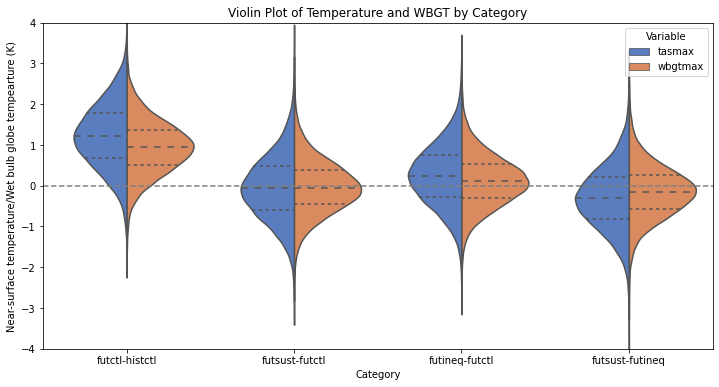

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn violin plot
plt.figure(figsize=(12, 6))  # Set the figure size

sns.violinplot(
    x="Category",    # Categories on the x-axis
    y="Value",       # Values on the y-axis
    hue="Variable",  # Separate violins by variable (temperature and wbgt)
    data=df2,
    split=True,       # Split the violins by the "Variable" hue
    inner="quart",   # Show quartiles inside the violins
    palette="muted"  # Choose a color palette
)

# Customize the plot
plt.axhline(y=0, linestyle='--', color='gray')
plt.title("Violin Plot of Temperature and WBGT by Category")
plt.ylabel("Near-surface temperature/Wet bulb globe tempearture (K)")
plt.legend(title="Variable")
plt.ylim(-4,4)


In [3]:
from func_sdh_oe import tseries_to_dataframe
import seaborn as sns

In [4]:
df_cesm=tseries_to_dataframe('cesm',mask='_trop_congo',annual=True)
df_mpiesm=tseries_to_dataframe('mpiesm',mask='_trop_congo',annual=True)
df_ecearth=tseries_to_dataframe('ecearth',mask='_trop_congo',annual=True)


{'T_presCTL': <xarray.DataArray 'TREFHT_daymax' (year: 30)>
array([302.65582, 302.67847, 302.96506, 303.1093 , 303.16   , 303.01758,
       302.91772, 302.63028, 302.51102, 303.05923, 303.08633, 302.74454,
       303.20587, 303.0025 , 303.00787, 303.05597, 303.24692, 303.05875,
       303.10794, 302.99023, 303.34988, 303.30515, 303.41525, 303.38675,
       303.24426, 303.25305, 303.5412 , 303.45004, 303.4765 , 303.52203],
      dtype=float32)
Coordinates:
  * year     (year) int64 1985 1986 1987 1988 1989 ... 2010 2011 2012 2013 2014, 'T_futCTL': <xarray.DataArray 'TREFHT_daymax' (year: 30)>
array([304.50018, 304.65433, 304.30396, 304.30902, 304.27145, 304.05524,
       304.42438, 304.54544, 304.09793, 304.31158, 304.26028, 304.1661 ,
       304.3871 , 304.82202, 304.42822, 304.49597, 304.49713, 304.32327,
       304.44788, 304.2161 , 304.3427 , 304.2524 , 304.4813 , 304.39777,
       304.5314 , 304.14417, 304.3527 , 304.1357 , 304.1016 , 304.35977],
      dtype=float32)
Coordinates:
 

{'T_presCTL': <xarray.DataArray 'tas_daymean' (year: 30)>
array([296.2976 , 296.72253, 296.88232, 296.8242 , 297.0617 , 297.04874,
       296.94052, 296.27902, 296.61465, 296.6789 , 296.39276, 296.71262,
       296.98053, 296.96985, 296.95062, 297.187  , 297.0165 , 297.11838,
       296.6722 , 296.70966, 297.0331 , 296.99185, 296.76474, 297.2029 ,
       297.06613, 297.26514, 297.0274 , 297.24408, 297.3151 , 297.6363 ],
      dtype=float32)
Coordinates:
    height   float64 2.0
  * year     (year) int64 1985 1986 1987 1988 1989 ... 2010 2011 2012 2013 2014, 'T_futCTL': <xarray.DataArray 'tas_daymean' (year: 30)>
array([297.83398, 297.55618, 297.3339 , 297.34857, 297.53162, 297.4428 ,
       297.39395, 297.2171 , 297.30655, 297.5332 , 297.6569 , 297.39114,
       297.4989 , 297.36935, 297.45944, 297.53778, 297.56885, 297.55963,
       297.37732, 297.4804 , 297.43375, 297.25272, 297.2098 , 297.49042,
       297.13226, 297.25772, 297.52472, 297.1344 , 296.97876, 297.21826],
      dtype=fl

In [5]:
print(df_cesm[1])

    Variable        Category     Value
0        T90  futCTL-presCTL  1.562183
1        T90  futCTL-presCTL  2.053766
2        T90  futCTL-presCTL  1.409741
3        T90  futCTL-presCTL  1.176117
4        T90  futCTL-presCTL  1.020508
..       ...             ...       ...
235   WBGT90     INEQ-futCTL -0.010922
236   WBGT90     INEQ-futCTL -0.045940
237   WBGT90     INEQ-futCTL  0.216446
238   WBGT90     INEQ-futCTL  0.302733
239   WBGT90     INEQ-futCTL  0.261992

[240 rows x 3 columns]


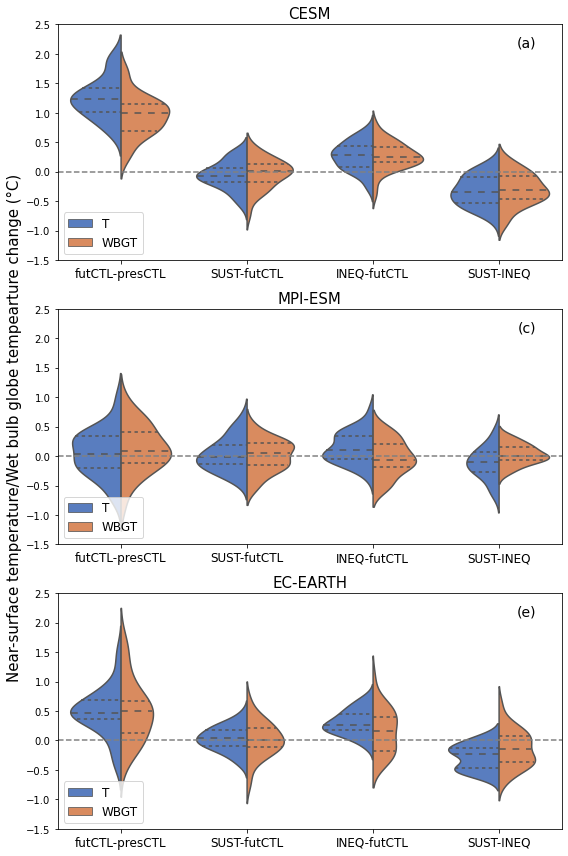

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

esm_list=['CESM','MPI-ESM','EC-EARTH']
subplot_labels=['a','c','e']
# Create and customize the Seaborn violin plots for df1, df2, and df3
for i, df in enumerate([df_cesm[0], df_mpiesm[0], df_ecearth[0]]):
    sns.violinplot(
        x="Category",
        y="Value",
        hue="Variable",
        data=df,
        split=True,
        inner="quart",
        palette="muted",
        ax=axes[i]  # Specify the subplot
    )
    
    # Add a horizontal stippled line at the 0 level for each subplot
    axes[i].axhline(y=0, linestyle='--', color='gray')
    
    # Customize the subplot titles, labels, and legend
    axes[i].set_title(esm_list[i],fontsize=15)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title="",fontsize=12,loc='lower left')
    axes[i].set_ylim(-1.5,2.5)
    axes[i].tick_params(axis='x', labelsize=12)  # Adjust the labelsize as needed
    axes[i].text(0.95, 0.95, f"({subplot_labels[i]})", transform=axes[i].transAxes,
                 fontsize=14, ha='right', va='top')
axes[1].set_ylabel("Near-surface temperature/Wet bulb globe tempearture change (°C)",fontsize=15)

# Adjust the space between subplots
plt.tight_layout()



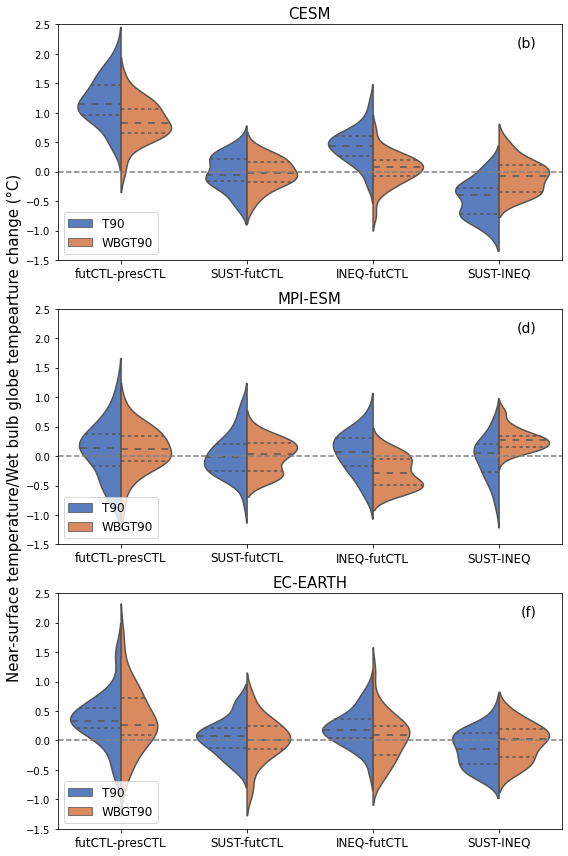

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

esm_list=['CESM','MPI-ESM','EC-EARTH']
subplot_labels=['b','d','f']
# Create and customize the Seaborn violin plots for df1, df2, and df3
for i, df in enumerate([df_cesm[1], df_mpiesm[1], df_ecearth[1]]):
    sns.violinplot(
        x="Category",
        y="Value",
        hue="Variable",
        data=df,
        split=True,
        inner="quart",
        palette="muted",
        ax=axes[i]  # Specify the subplot
    )
    
    # Add a horizontal stippled line at the 0 level for each subplot
    axes[i].axhline(y=0, linestyle='--', color='gray')
    
    # Customize the subplot titles, labels, and legend
    axes[i].set_title(esm_list[i],fontsize=15)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title="",fontsize=12,loc='lower left')
    axes[i].set_ylim(-1.5,2.5)
    axes[i].tick_params(axis='x', labelsize=12)  # Adjust the labelsize as needed
    axes[i].text(0.95, 0.95, f"({subplot_labels[i]})", transform=axes[i].transAxes,
                 fontsize=14, ha='right', va='top')
axes[1].set_ylabel("Near-surface temperature/Wet bulb globe tempearture change (°C)",fontsize=15)

# Adjust the space between subplots
plt.tight_layout()



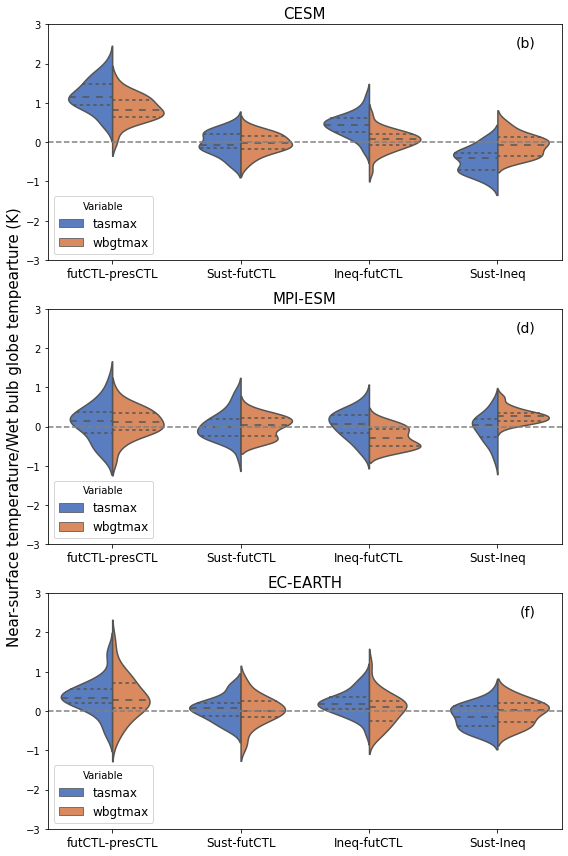

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

esm_list=['CESM','MPI-ESM','EC-EARTH']
subplot_labels=['b','d','f']
# Create and customize the Seaborn violin plots for df1, df2, and df3
for i, df in enumerate([df_cesm[1], df_mpiesm[1], df_ecearth[1]]):
    sns.violinplot(
        x="Category",
        y="Value",
        hue="Variable",
        data=df,
        split=True,
        inner="quart",
        palette="muted",
        ax=axes[i]  # Specify the subplot
    )
    
    # Add a horizontal stippled line at the 0 level for each subplot
    axes[i].axhline(y=0, linestyle='--', color='gray')
    
    # Customize the subplot titles, labels, and legend
    axes[i].set_title(esm_list[i],fontsize=15)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title="",fontsize=12,loc='lower left')
    axes[i].set_ylim(-3,3)
    axes[i].tick_params(axis='x', labelsize=12)  # Adjust the labelsize as needed
    axes[i].text(0.95, 0.95, f"({subplot_labels[i]})", transform=axes[i].transAxes,
                 fontsize=14, ha='right', va='top')
axes[1].set_ylabel("Near-surface temperature/Wet bulb globe tempearture change (°C)",fontsize=15)

# Adjust the space between subplots
plt.tight_layout()



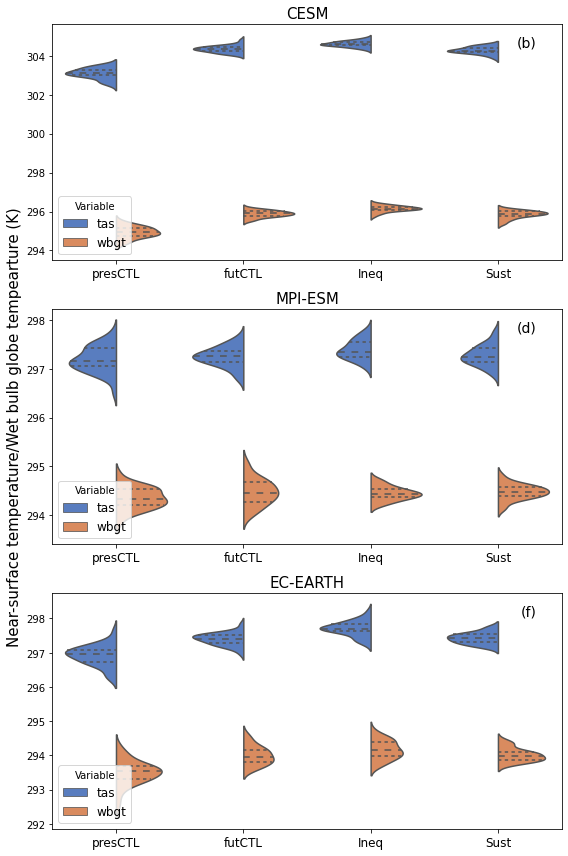

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

esm_list=['CESM','MPI-ESM','EC-EARTH']
subplot_labels=['b','d','f']
# Create and customize the Seaborn violin plots for df1, df2, and df3
for i, df in enumerate([df_cesm[2], df_mpiesm[2], df_ecearth[2]]):
    sns.violinplot(
        x="Category",
        y="Value",
        hue="Variable",
        data=df,
        split=True,
        inner="quart",
        palette="muted",
        ax=axes[i]  # Specify the subplot
    )
    
    # Customize the subplot titles, labels, and legend
    axes[i].set_title(esm_list[i],fontsize=15)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title="Variable",fontsize=12,loc='lower left')
    #axes[i].set_ylim(-3,3)
    axes[i].tick_params(axis='x', labelsize=12)  # Adjust the labelsize as needed
    axes[i].text(0.95, 0.95, f"({subplot_labels[i]})", transform=axes[i].transAxes,
                 fontsize=14, ha='right', va='top')
axes[1].set_ylabel("Near-surface temperature/Wet bulb globe tempearture (K)",fontsize=15)

# Adjust the space between subplots
plt.tight_layout()



In [9]:
df_cesm=tseries_to_dataframe('cesm',mask='_trop',annual=True)
df_mpiesm=tseries_to_dataframe('mpiesm',mask='_trop',annual=True)
df_ecearth=tseries_to_dataframe('ecearth',mask='_trop',annual=True)


{'tas_presCTL': <xarray.DataArray 'TREFHT_daymax' (year: 30)>
array([302.9705 , 302.77145, 303.1514 , 303.32083, 303.18796, 303.0307 ,
       302.98895, 302.61627, 302.75137, 303.23538, 303.4219 , 303.01038,
       303.40714, 303.27567, 303.07025, 303.1949 , 303.51117, 303.27356,
       303.1953 , 303.24405, 303.49756, 303.31885, 303.59924, 303.5425 ,
       303.44217, 303.48737, 303.74945, 303.6183 , 303.60947, 303.8652 ],
      dtype=float32)
Coordinates:
  * year     (year) int64 1985 1986 1987 1988 1989 ... 2010 2011 2012 2013 2014, 'tas_futCTL': <xarray.DataArray 'TREFHT_daymax' (year: 30)>
array([304.6292 , 304.81775, 304.35587, 304.63647, 304.48062, 304.1267 ,
       304.60287, 304.51825, 304.12073, 304.44623, 304.47382, 304.44556,
       304.52753, 304.86856, 304.5673 , 304.66507, 304.63785, 304.5885 ,
       304.75745, 304.35098, 304.46613, 304.47775, 304.50674, 304.47653,
       304.61215, 304.29126, 304.5153 , 304.41855, 304.23093, 304.4121 ],
      dtype=float32)
Coordinate

{'tas_presCTL': <xarray.DataArray 'tas_daymean' (year: 30)>
array([296.87622, 297.29483, 297.46765, 297.34192, 297.5693 , 297.73294,
       297.60583, 296.71948, 297.19772, 297.15988, 297.11694, 297.38153,
       297.6449 , 297.6604 , 297.67374, 297.80722, 297.6972 , 297.76492,
       297.3994 , 297.4067 , 297.6967 , 297.72754, 297.44177, 297.74387,
       297.66174, 298.04907, 297.7666 , 297.91116, 297.88202, 298.21002],
      dtype=float32)
Coordinates:
    height   float64 2.0
  * year     (year) int64 1985 1986 1987 1988 1989 ... 2010 2011 2012 2013 2014, 'tas_futCTL': <xarray.DataArray 'tas_daymean' (year: 30)>
array([298.53247, 298.17322, 298.1528 , 298.12247, 298.3294 , 298.15378,
       298.14136, 297.98737, 298.14044, 298.28326, 298.45245, 298.2121 ,
       298.3098 , 298.14172, 298.1655 , 298.3068 , 298.26334, 298.27377,
       298.07104, 298.2648 , 298.30896, 297.84033, 297.86887, 298.25827,
       297.87653, 297.96927, 298.3529 , 297.94843, 297.7455 , 298.05347],
      dtyp

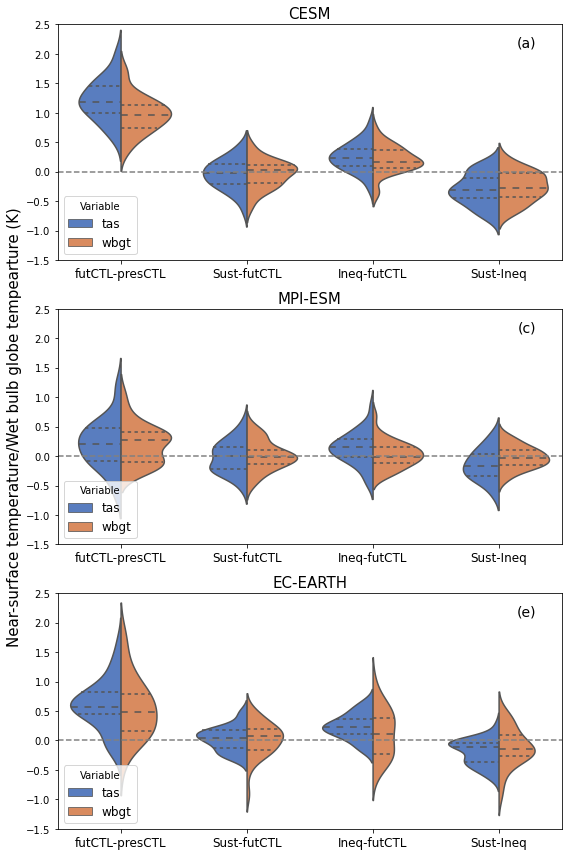

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

esm_list=['CESM','MPI-ESM','EC-EARTH']
subplot_labels=['a','c','e']
# Create and customize the Seaborn violin plots for df1, df2, and df3
for i, df in enumerate([df_cesm[0], df_mpiesm[0], df_ecearth[0]]):
    sns.violinplot(
        x="Category",
        y="Value",
        hue="Variable",
        data=df,
        split=True,
        inner="quart",
        palette="muted",
        ax=axes[i]  # Specify the subplot
    )
    
    # Add a horizontal stippled line at the 0 level for each subplot
    axes[i].axhline(y=0, linestyle='--', color='gray')
    
    # Customize the subplot titles, labels, and legend
    axes[i].set_title(esm_list[i],fontsize=15)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title="Variable",fontsize=12,loc='lower left')
    axes[i].set_ylim(-1.5,2.5)
    axes[i].tick_params(axis='x', labelsize=12)  # Adjust the labelsize as needed
    axes[i].text(0.95, 0.95, f"({subplot_labels[i]})", transform=axes[i].transAxes,
                 fontsize=14, ha='right', va='top')
axes[1].set_ylabel("Near-surface temperature/Wet bulb globe tempearture (K)",fontsize=15)

# Adjust the space between subplots
plt.tight_layout()



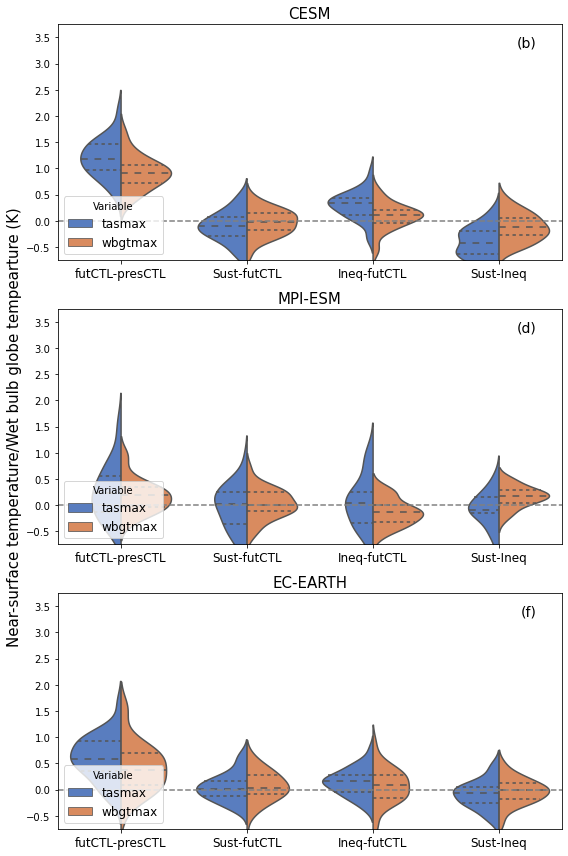

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

esm_list=['CESM','MPI-ESM','EC-EARTH']
subplot_labels=['b','d','f']
# Create and customize the Seaborn violin plots for df1, df2, and df3
for i, df in enumerate([df_cesm[1], df_mpiesm[1], df_ecearth[1]]):
    sns.violinplot(
        x="Category",
        y="Value",
        hue="Variable",
        data=df,
        split=True,
        inner="quart",
        palette="muted",
        ax=axes[i]  # Specify the subplot
    )
    
    # Add a horizontal stippled line at the 0 level for each subplot
    axes[i].axhline(y=0, linestyle='--', color='gray')
    
    # Customize the subplot titles, labels, and legend
    axes[i].set_title(esm_list[i],fontsize=15)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title="Variable",fontsize=12,loc='lower left')
    axes[i].set_ylim(-0.75,3.75)
    axes[i].tick_params(axis='x', labelsize=12)  # Adjust the labelsize as needed
    axes[i].text(0.95, 0.95, f"({subplot_labels[i]})", transform=axes[i].transAxes,
                 fontsize=14, ha='right', va='top')
axes[1].set_ylabel("Near-surface temperature/Wet bulb globe tempearture (K)",fontsize=15)

# Adjust the space between subplots
plt.tight_layout()

